# Data preparation

In [1]:
# Libraries

## Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns

## Plotting
import matplotlib.pyplot as plt

# Basic cleaning
## Variance
from sklearn.feature_selection import VarianceThreshold


## Data cleaning

### Basic data cleaning

🔍 **Why Data Cleaning Matters**
- Essential in every ML project; often skipped at a cost.
- Prevents model failure and misleading performance results.
- Helps prepare trustworthy, high-quality datasets.

In [2]:
# Load datasets
path_oil_spill = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv"
oil_spill_data=pd.read_csv(path_oil_spill,header=None)
display(f"Shape of oil_spill_data : {oil_spill_data.shape}")

# Load Iris Flower dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
display(f"Shape of iris_data : {iris_data.shape}")

'Shape of oil_spill_data : (937, 50)'

'Shape of iris_data : (150, 5)'

In [3]:
# Copy of datasets
oil_spill_data_copy = oil_spill_data.copy()
iris_data_copy = iris_data.copy()

#### Identify Columns That Contain a Single Value

In [4]:
# Summurize the number of unique values in each column
oil_spill_data.nunique();

#### Delete Columns That Contain a Single Value

In [5]:
# Create a function to drop columns that have a single value
def drop_single_value_columns(df : pd.DataFrame) -> pd.DataFrame:
        """
    Drop columns with a single unique value 
    Args:
        df (DataFrame): Raw data
    Returns:
        df (DataFrame) with no single value columns
    """ 
        print(f"Shape BEFORE dropping single value columns: {df.shape}") 
        
        # get number of unique values for each column 
        counts = df.nunique()
        
        # record columns to delete (i.e columns that only contain a unique value)
        to_del = [i for i,v in enumerate(counts) if v == 1]
    
        print(f"Names of single value columns: {to_del}") 
        
        # drop useless columns 
        df.drop(to_del, axis=1, inplace=True) 
        
        print(f"Shape AFTER dropping single value columns: {df.shape}") 
        return df

In [6]:
oil_spill_data = drop_single_value_columns(oil_spill_data)

Shape BEFORE dropping single value columns: (937, 50)
Names of single value columns: [22]
Shape AFTER dropping single value columns: (937, 49)


#### Consider Columns That Have Very Few Values

This does not mean that these rows and columns should be deleted, but they require further attention. <br>
For example: <br>
•	Perhaps the unique values can be encoded as ordinal values? <br>
•	Perhaps the unique values can be encoded as categorical values? <br>
•	Perhaps compare model skill with each variable removed from the dataset?


In [7]:
# Retrieve original data
oil_spill_data = oil_spill_data_copy

In [8]:
# Create a function that print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
def show_unique_values_percentage(df : pd.DataFrame):
    """
    Print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
    Args:
        - df (DataFrame): Raw data
    """  
    for i in range(df.shape[1]):
        num = df.nunique().values[i]
        percentage = float(num) / df.shape[0] * 100
        print(f"{i}, {num}, {round(percentage,1)}%")

In [9]:
show_unique_values_percentage(oil_spill_data)

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


In [10]:
# Create a function that print index, number of unique values and percentage of unique values per column in regard to total number of rows per column
def show_unique_values_percentage_below_threshold(df : pd.DataFrame,threshold : float):
    """
    Print index, number of unique values (below a threshold) 
    and percentage of unique values per column in regard to total 
    number of rows per column
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    """  
    for i in range(df.shape[1]):
        num = df.nunique().values[i]
        percentage = float(num) / df.shape[0] * 100
        if percentage < threshold:
            print(f"{i}, {num}, {round(percentage,1)}%")

In [11]:
show_unique_values_percentage_below_threshold(oil_spill_data, 1.0)

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


In [12]:
# Create a function to get columns where number of unique values is less than X% of the rows of the entire considered dataset
def get_columns_with_few_values_under_threshold(df : pd.DataFrame, threshold : float) -> list:
    """
    Get columns where number of unique values is less than X% of the rows of the entire considered dataset
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    Returns:
        df (DataFrame) with no columns whose number of unique values are below threshold (in regard to total number of rows of considered dataset)
    """    
    # get number of unique values for each column 
    counts = df.nunique() 
    
    # record columns to delete 
    cols_with_few_values = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < threshold]

    return cols_with_few_values

In [13]:
get_columns_with_few_values_under_threshold(oil_spill_data, 1.0)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]

In [14]:
# Create a function to drop columns where number of unique values is less than X% of the rows of the entire considered dataset
def drop_columns_with_few_values_under_threshold(df : pd.DataFrame, threshold : float) -> pd.DataFrame:
    """
    Drop columns where number of unique values is less than X% of the rows of the entire considered dataset
    Args:
        - df (DataFrame): Raw data
        - threshold (float) : percentage (%)
    Returns:
        df (DataFrame) with no columns whose number of unique values are below threshold (in regard to total number of rows of considered dataset)
    """ 
    print(f"Shape BEFORE dropping few value columns: {df.shape}")
    
    # get number of unique values for each column 
    counts = df.nunique() 
    
    # record columns to delete 
    to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < threshold]

    print(f"Names of columns with few values: {to_del}") 
    
    # drop useless columns 
    df.drop(to_del, axis=1, inplace=True) 
    
    print(f"Shape AFTER dropping columns with few values: {df.shape}") 
    return df

In [15]:
oil_spill_data = drop_columns_with_few_values_under_threshold(oil_spill_data, 1.0)

Shape BEFORE dropping few value columns: (937, 50)
Names of columns with few values: [21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
Shape AFTER dropping columns with few values: (937, 39)


#### Remove columns that have a low variance

In [16]:
# explore the effect of the variance thresholds on the number of selected features from numpy import arange 
def explore_variance_threshold_effects(df : pd.DataFrame, range : np.arange):
    """
    Explore the effect of the variance thresholds on the number of selected features from numpy import arange 
    Args:
        - df (DataFrame): Raw data
        - range (np.arange) : variance range to check
    Returns:
        - Print number of features whose variance is over the considered threshold
        - Plot the number of features whose variance is over the considered threshold
    """ 
    
    # apply transform with each threshold 
    results = list() 

    for t in range: 
        # define the transform 
        transform = VarianceThreshold(threshold=t) 
        
        # transform the input data 
        df_sel = transform.fit_transform(df) 
        
        # determine the number of input features 
        n_features = df_sel.shape[1] 
        
        print(f">Threshold={round(t,2)}, Features={n_features}")
        
        # store the result 
        results.append(n_features) 
        
    # plot the threshold vs the number of selected features 
    plt.plot(range, results) 
    plt.show()

(937, 38) (937,)
>Threshold=0.0, Features=38
>Threshold=0.05, Features=29
>Threshold=0.1, Features=28
>Threshold=0.15, Features=28
>Threshold=0.2, Features=28
>Threshold=0.25, Features=28
>Threshold=0.3, Features=28
>Threshold=0.35, Features=28
>Threshold=0.4, Features=28
>Threshold=0.45, Features=26
>Threshold=0.5, Features=25


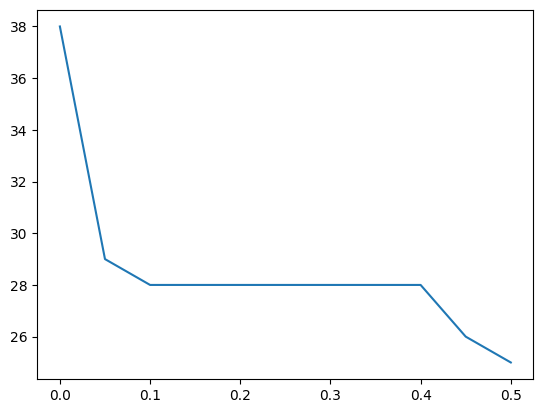

In [17]:
# Retrieve original data
oil_spill_data = oil_spill_data_copy

# split data into inputs and outputs 
data = oil_spill_data.values 
X = data[:, :-1] 
y = data[:, -1] 
print(X.shape, y.shape) 

# define variance thresholds to check 
thresholds = np.arange(0.0, 0.55, 0.05) 

explore_variance_threshold_effects(X, thresholds)

In [18]:
# Remove features whose variance is lower than threshold
threshold = 0.4

# Retrieve original data
oil_spill_data = oil_spill_data_copy

# split data into inputs and outputs 
data = oil_spill_data.values 
X = data[:, :-1] 
y = data[:, -1] 
print(X.shape) 

# define the transform 
transform = VarianceThreshold(threshold=threshold) 

# transform the input data 
X_sel = transform.fit_transform(X) 

print(X_sel.shape) 

(937, 38)
(937, 28)


#### Identify rows that contain duplicate data

In [19]:
# Retrieve original data
iris_data = iris_data_copy

In [20]:
# calculate duplicates 
dups = iris_data.duplicated() 

# report if there are any duplicates 
print(dups.any()) 

# list all duplicate rows 
print(iris_data[dups])

True
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     target  
142       2  


#### Delete rows thtat contain duplicate data

In [21]:
def check_duplicates(df):
    """
    Counts duplicated rows. If any, function drops duplicated rows.
    Args:
        df (DataFrame): Raw data
    Returns:
        - df (Dataframe) without duplicated rows, a string otherwise.
    """

    # Check number of rows before removing duplicates
    print(f"Number of rows : {len(df)}")

    # Compute the number of duplicated rows
    num_dups = df.duplicated().sum()
    
    print(f"Number of duplicated rows : {num_dups}")

    if df.duplicated().any():
        # Remove duplicates
        df_no_duplicates = df.drop_duplicates()
        print(f"{num_dups} duplicated row(s) removed")
        return df_no_duplicates
    else:
        return "No duplicated rows found !"    

In [22]:
iris_data_no_dups = check_duplicates(iris_data)

Number of rows : 150
Number of duplicated rows : 1
1 duplicated row(s) removed


### Outlier Identification and Removal

In [23]:
# generate gaussian data 
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean 
from numpy import std 
# seed the random number generator 
seed(1) 
# generate univariate observations 
data = 5 * randn(10000) + 50 
# summarize 
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


<Axes: >

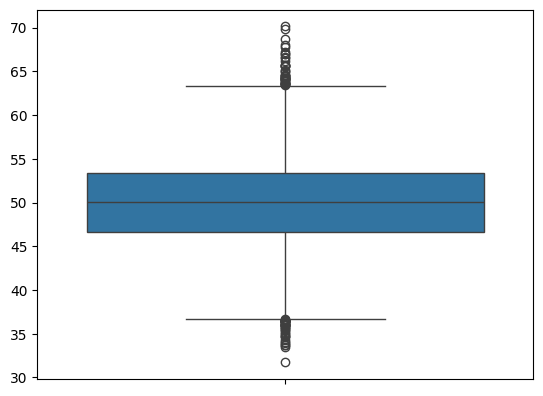

In [24]:
# Plot boxplot of data
fig, ax = plt.subplots()
sns.boxplot(data=data, ax=ax)

#### Standard Deviation Method 

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers. 

In [25]:
# If distribution Gaussian or Gaussian-like, we use the standard deviation of the sample as a cut-off for identifying outliers
def identify_outliers_std_dev_method(data : np.ndarray):
    """
    If distribution Gaussian or Gaussian-like, we use the standard deviation of the sample as a cut-off for identifying outliers
    Args:
        data (ndarray): Raw data
    Returns:
        - outliers (ndarray) : only identified outliers
        - outliers_removed (ndarray) : data with outliers removed
    """

    # calculate summary statistics 
    data_mean, data_std = mean(data), std(data) 

    # define outliers 
    cut_off = data_std * 3 
    lower, upper = data_mean - cut_off, data_mean + cut_off 

    # identify outliers 
    outliers = [x for x in data if x < lower or x > upper] 
    print(f"Identified outliers: {len(outliers)}") 

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print(f"Non-outlier observations: {len(outliers_removed)}")

    return outliers, outliers_removed

So far we have only talked about univariate data with a Gaussian distribution, e.g. a single variable. You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution. You can imagine bounds in two dimensions that would define an ellipse if you have two variables. Observations that fall outside of the ellipse would be considered outliers. In three dimensions, this would be an ellipsoid, and so on into higher dimensions. Alternately, if you knew more about the domain, perhaps an outlier may be identified by exceeding the limits on one or a subset of the data dimensions.

In [26]:
# identify outliers with standard deviation 
from numpy.random import seed 
from numpy.random import randn 
from numpy import mean 
from numpy import std 

# seed the random number generator 
seed(1) 

# generate univariate observations 
data = 5 * randn(10000) + 50 

outliers, outliers_removed = identify_outliers_std_dev_method(data)

Identified outliers: 29
Non-outlier observations: 9971


#### Interquartile Range Method 

In [27]:
# identify outliers with interquartile range 
def identify_outliers_iqr_method(data : np.ndarray):
    """
    A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.
    This function identifies outliers with interquartile range (iqr).
    Args:
        data (ndarray): Raw data
    Returns:
        - outliers (ndarray) : only identified outliers
        - outliers_removed (ndarray) : data with outliers removed
    """
    
    # calculate interquartile range 
    q25, q75 = percentile(data, 25), percentile(data, 75) 
    iqr = q75 - q25 
    print(f"Percentiles: 25th={round(q25,3)}, 75th={round(q75,3)}, IQR={round(iqr,3)}") 
    
    # calculate the outlier cutoff 
    cut_off = iqr * 1.5 
    lower, upper = q25 - cut_off, q75 + cut_off 
    
    # identify outliers 
    outliers = [x for x in data if x < lower or x > upper] 
    print('Identified outliers: %d' % len(outliers)) 
    
    # remove outliers 
    outliers_removed = [x for x in data if x >= lower and x <= upper] 
    print('Non-outlier observations: %d' % len(outliers_removed))
    
    return outliers, outliers_removed

In [28]:
# identify outliers with interquartile range 
from numpy.random import seed 
from numpy.random import randn 
from numpy import percentile 
# seed the random number generator 
seed(1) 
# generate univariate observations 
data = 5 * randn(10000) + 50 

outliers, outliers_removed = identify_outliers_iqr_method(data)

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


#### Automatic Outlier Detection 

In [29]:
# Load Boston Housing Dataset 
boston_housing = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv "
boston_housing=pd.read_csv(boston_housing,header=None)
display(f"Shape of boston_housing : {boston_housing.shape}")

'Shape of boston_housing : (506, 14)'

In [30]:
# evaluate model on the raw dataset 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements 
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

MAE: 3.417


##### LocalOutlierFactor

In [31]:
# evaluate model on training dataset with outliers removed 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize the shape of the training dataset 
print(X_train.shape, y_train.shape) 

# identify outliers in the training dataset 
lof = LocalOutlierFactor() 
yhat = lof.fit_predict(X_train) 

# select all rows that are not outliers 
mask = yhat != -1 
X_train, y_train = X_train[mask, :], y_train[mask] 

# summarize the shape of the updated training dataset 
print(X_train.shape, y_train.shape) 

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


##### IsolationForest 

In [32]:
# evaluate model on training dataset with outliers removed 
from pandas import read_csv 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error 

# retrieve the array 
data = boston_housing.values 

# split into input and output elements
X, y = data[:, :-1], data[:, -1] 

# split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize the shape of the training dataset 
print(X_train.shape, y_train.shape) 

# identify outliers in the training dataset 
lof = IsolationForest() 
yhat = lof.fit_predict(X_train) 

# select all rows that are not outliers 
mask = yhat != -1 
X_train, y_train = X_train[mask, :], y_train[mask] 

# summarize the shape of the updated training dataset 
print(X_train.shape, y_train.shape) 

# fit the model 
model = LinearRegression() 
model.fit(X_train, y_train) 

# evaluate the model 
yhat = model.predict(X_test) 

# evaluate predictions 
mae = mean_absolute_error(y_test, yhat) 
print(f"MAE: {round(mae,3)}")

(339, 13) (339,)
(294, 13) (294,)
MAE: 3.218


### How to Mark and Remove Missing Data

In [33]:
# Load datasets

# Load diabetes data
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

diabetes_data=pd.read_csv(path_diabetes,header=None)
display(f"Shape of diabetes_data : {diabetes_data.shape}")

'Shape of diabetes_data : (768, 9)'

In [34]:
# Copy of datasets
diabetes_data_copy = diabetes_data.copy()

#### Mark Missing Values

In [35]:
# Summarize the dataset from pandas import read_csv
print(diabetes_data.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

This is useful. We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

In [36]:
# example of summarizing the number of missing values for each variable from pandas import read_csv
# count the number of missing values for each column 
num_missing = (diabetes_data[[1,2,3,4,5]] == 0).sum()

# report the results 
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN. Values with a NaN value are ignored from operations like sum, count, etc. We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we are interested in. After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as True and get a count of the missing values for each column.

In [37]:
# example of marking missing values with nan values from numpy import nan
 # replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# count the number of nan values in each column 
print(diabetes_data.isnull().sum())


0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


This is a useful summary, as we want to confirm that we have not fooled ourselves somehow.
Below is the same example, except we print the first 20 rows of data.

In [38]:
# example of review data with missing values marked with a nan from numpy import nan
# replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# summarize the first 20 rows of data 
print(diabetes_data.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

#### Missing Values Cause Problems

Having missing values in a dataset can cause errors with some machine learning algorithms.
In this section, we will try to evaluate the Linear Discriminant Analysis (LDA) algorithm on the dataset with missing values. This is an algorithm that does not work when there are missing values in the dataset. The example below marks the missing values in the dataset, as we did in the previous section, then attempts to evaluate LDA using 3-fold cross-validation and print the mean accuracy


In [39]:
# # example where missing values cause errors from numpy import nan
# from pandas import read_csv
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

# # load the dataset
# diabetes_data = diabetes_data_copy

# # replace '0' values with 'nan'
# diabetes_data[[1,2,3,4,5]] = diabetes_data[[1,2,3,4,5]].replace(0, np.nan) 

# # split dataset into inputs and outputs
# values = diabetes_data.values
# X = values[:,0:8]
# y = values[:,8]

# # define the model
# model  =  LinearDiscriminantAnalysis()

# # define the model evaluation procedure
# cv = KFold(n_splits=3, shuffle=True, random_state=1) 

# # evaluate the model
# result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# # report the mean performance 
# print('Accuracy: %.3f' % result.mean())

Example error message when trying to evaluate a model with missing values.

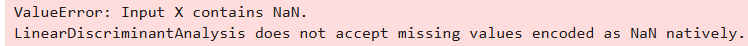

This is as we expect. We are prevented from evaluating an LDA algorithm (and other algorithms) on the dataset with missing values.

#### Remove Rows With Missing Values

The simplest strategy for handling missing data is to remove records that contain a missing value.

In [40]:
# example of removing rows that contain missing values from numpy import nan
from pandas import read_csv 

# load the dataset
diabetes_data = diabetes_data_copy

# summarize the shape of the raw data
print(diabetes_data.shape)

# replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# drop rows with missing values 
diabetes_data.dropna(inplace=True)

# summarize the shape of the data with missing rows removed 
print(diabetes_data.shape)

(768, 9)
(392, 9)


We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

In [41]:
# evaluate model on data after rows with missing data are removed from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# load the dataset
diabetes_data = diabetes_data_copy

# replace '0' values with 'nan'
diabetes_data[[1,2,3,4,5]]  =  diabetes_data[[1,2,3,4,5]].replace(0,  np.nan) 

# drop rows with missing values 
diabetes_data.dropna(inplace=True)

# split dataset into inputs and outputs 
values = diabetes_data.values
X = values[:,0:8]
y = values[:,8]

# define the model
model  =  LinearDiscriminantAnalysis()

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1) 

# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy') 

# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


**Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.**

### How to Use Statistical Imputation

In [42]:
# Load datasets

# Load diabetes data
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"

horse_colic_data=pd.read_csv(path_horse_colic,header=None)
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [43]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [44]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


Marking missing values with a NaN (not a number) value in a loaded dataset using Python is a best practice. 
**We can load the dataset using the read csv() Pandas function and specify the na values to load values of “?” as missing, marked with a NaN value.**

In [45]:
# load dataset
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [46]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [47]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [48]:
# summarize the number of rows with missing values for each column 
for i in range(horse_colic_data.shape[1]):
    # count number of rows with missing values 
    n_miss = horse_colic_data.iloc[i].isnull().sum()
    perc = n_miss / horse_colic_data.shape[0] * 100
    perc = round(perc,1)
    print(f'> {i}, Missing: {n_miss} ({perc}%)' )

> 0, Missing: 6 (2.0%)
> 1, Missing: 5 (1.7%)
> 2, Missing: 5 (1.7%)
> 3, Missing: 1 (0.3%)
> 4, Missing: 12 (4.0%)
> 5, Missing: 8 (2.7%)
> 6, Missing: 3 (1.0%)
> 7, Missing: 8 (2.7%)
> 8, Missing: 4 (1.3%)
> 9, Missing: 4 (1.3%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 4 (1.3%)
> 12, Missing: 4 (1.3%)
> 13, Missing: 2 (0.7%)
> 14, Missing: 1 (0.3%)
> 15, Missing: 3 (1.0%)
> 16, Missing: 3 (1.0%)
> 17, Missing: 16 (5.3%)
> 18, Missing: 2 (0.7%)
> 19, Missing: 9 (3.0%)
> 20, Missing: 2 (0.7%)
> 21, Missing: 3 (1.0%)
> 22, Missing: 7 (2.3%)
> 23, Missing: 10 (3.3%)
> 24, Missing: 5 (1.7%)
> 25, Missing: 15 (5.0%)
> 26, Missing: 1 (0.3%)
> 27, Missing: 2 (0.7%)


#### Statistical Imputation With SimpleImputer

The scikit-learn machine learning library provides the SimpleImputer class that supports statistical imputation. In this section, we will explore how to effectively use the SimpleImputer class.

In [49]:
# statistical imputation transform for the horse colic dataset from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# summarize total missing
print(f"Missing:  {sum(np.isnan(X).flatten())}") 

# define imputer
imputer = SimpleImputer(strategy='mean') 

# fit on the dataset
imputer.fit(X)

# transform the dataset 
Xtrans = imputer.transform(X) 

# summarize total missing
print(f"Missing:  {sum(np.isnan(Xtrans).flatten())}") 

Missing:  1605
Missing:  0


#### SimpleImputer and Model Evaluation

It is a good practice to evaluate machine learning models on a dataset using k-fold cross- validation. **To correctly apply statistical missing data imputation and avoid data leakage**, it is required that the statistics calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset.

This can be achieved by creating a modeling pipeline where the first step is the statistical imputation, then the second step is the model. This can be achieved using the Pipeline class. For example, the Pipeline below uses a SimpleImputer with a ‘mean’ strategy, followed by a random forest model.

In [50]:
# evaluate mean imputation and random forest for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)]) 

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print(f'Mean Accuracy: {round(mean(scores),3)} ({round(std(scores),3)})')

Mean Accuracy: 0.861 (0.053)


#### Comparing Different Imputed Statistics

How do we know that using a ‘mean’ statistical strategy is good or best for this dataset? The answer is that we don’t and that it was chosen arbitrarily. We can design an experiment to test each statistical strategy and discover what works best for this dataset, comparing the mean, median, mode (most frequent), and constant (0) strategies. The mean accuracy of each approach can then be compared. The complete example is listed below.

>mean 0.863 (0.050)
>median 0.873 (0.053)
>most_frequent 0.874 (0.057)
>constant 0.876 (0.052)


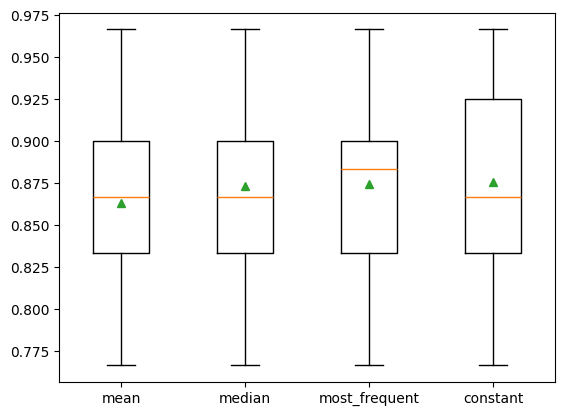

In [51]:
# compare statistical imputation strategies for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant'] 

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])

    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()


#### SimpleImputer Transform When Making a Prediction

In [52]:
# constant imputation strategy and prediction for the horse colic dataset from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])

# fit the model 
pipeline.fit(X, y) 

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row]) 

# summarize prediction
print('Predicted Class: %d'  % yhat[0])

Predicted Class: 2


### How to Use KNN Imputation

In [53]:
# Load datasets

# Load diabetes data
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"

horse_colic_data=pd.read_csv(path_horse_colic,header=None)
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [54]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [55]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


Marking missing values with a NaN (not a number) value in a loaded dataset using Python is a best practice. 
**We can load the dataset using the read csv() Pandas function and specify the na values to load values of “?” as missing, marked with a NaN value.**

In [56]:
# load dataset
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [57]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [58]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [59]:
# summarize the number of rows with missing values for each column 
for i in range(horse_colic_data.shape[1]):
    # count number of rows with missing values 
    n_miss = horse_colic_data.iloc[i].isnull().sum()
    perc = n_miss / horse_colic_data.shape[0] * 100
    perc = round(perc,1)
    print(f'> {i}, Missing: {n_miss} ({perc}%)' )

> 0, Missing: 6 (2.0%)
> 1, Missing: 5 (1.7%)
> 2, Missing: 5 (1.7%)
> 3, Missing: 1 (0.3%)
> 4, Missing: 12 (4.0%)
> 5, Missing: 8 (2.7%)
> 6, Missing: 3 (1.0%)
> 7, Missing: 8 (2.7%)
> 8, Missing: 4 (1.3%)
> 9, Missing: 4 (1.3%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 4 (1.3%)
> 12, Missing: 4 (1.3%)
> 13, Missing: 2 (0.7%)
> 14, Missing: 1 (0.3%)
> 15, Missing: 3 (1.0%)
> 16, Missing: 3 (1.0%)
> 17, Missing: 16 (5.3%)
> 18, Missing: 2 (0.7%)
> 19, Missing: 9 (3.0%)
> 20, Missing: 2 (0.7%)
> 21, Missing: 3 (1.0%)
> 22, Missing: 7 (2.3%)
> 23, Missing: 10 (3.3%)
> 24, Missing: 5 (1.7%)
> 25, Missing: 15 (5.0%)
> 26, Missing: 1 (0.3%)
> 27, Missing: 2 (0.7%)


#### KNNImputer Data Transform

In [60]:
# knn imputation transform for the horse colic dataset from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer 

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(np.isnan(X).flatten())) 

# define imputer
imputer = KNNImputer() 

# fit on the dataset 
imputer.fit(X)

# transform the dataset 
Xtrans = imputer.transform(X) 

# summarize total missing
print('Missing: %d'  % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


#### KNNImputer and Model Evaluation

In [61]:
# evaluate knn imputation and random forest for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier() 
imputer = KNNImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.868 (0.053)


#### KNNImputer and Different Number of Neighbors

>1 0.864 (0.055)
>3 0.853 (0.054)
>5 0.863 (0.053)
>7 0.870 (0.055)
>9 0.869 (0.058)
>15 0.851 (0.055)
>18 0.858 (0.056)
>21 0.859 (0.055)


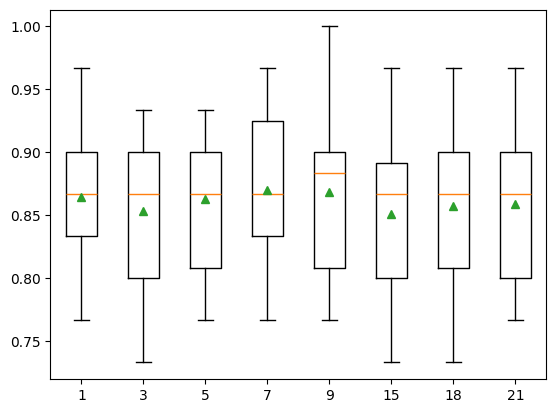

In [62]:
# compare knn imputation strategies for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]] 

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    # store results
    results.append(scores)  
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()

#### KNNImputer Transform When Making a Prediction

In [63]:
# knn imputation strategy and prediction for the horse colic dataset from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

# load dataset
horse_colic_data = horse_colic_data_copy

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m', RandomForestClassifier())])

# fit the model 
pipeline.fit(X, y) 

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row]) 

# summarize prediction
print('Predicted Class: %d'  % yhat[0])

Predicted Class: 2


### How to Use Iterative Imputation

In [64]:
# Load datasets

# Load diabetes data
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"

horse_colic_data=pd.read_csv(path_horse_colic,header=None)
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [65]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [66]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


Marking missing values with a NaN (not a number) value in a loaded dataset using Python is a best practice. 
**We can load the dataset using the read csv() Pandas function and specify the na values to load values of “?” as missing, marked with a NaN value.**

In [67]:
# load dataset
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')
display(f"Shape of horse_colic_data : {horse_colic_data.shape}")

'Shape of horse_colic_data : (300, 28)'

In [68]:
# Copy of datasets
horse_colic_data_copy = horse_colic_data.copy()

In [69]:
# Head of data
horse_colic_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [70]:
# summarize the number of rows with missing values for each column 
for i in range(horse_colic_data.shape[1]):
    # count number of rows with missing values 
    n_miss = horse_colic_data.iloc[i].isnull().sum()
    perc = n_miss / horse_colic_data.shape[0] * 100
    perc = round(perc,1)
    print(f'> {i}, Missing: {n_miss} ({perc}%)' )

> 0, Missing: 6 (2.0%)
> 1, Missing: 5 (1.7%)
> 2, Missing: 5 (1.7%)
> 3, Missing: 1 (0.3%)
> 4, Missing: 12 (4.0%)
> 5, Missing: 8 (2.7%)
> 6, Missing: 3 (1.0%)
> 7, Missing: 8 (2.7%)
> 8, Missing: 4 (1.3%)
> 9, Missing: 4 (1.3%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 4 (1.3%)
> 12, Missing: 4 (1.3%)
> 13, Missing: 2 (0.7%)
> 14, Missing: 1 (0.3%)
> 15, Missing: 3 (1.0%)
> 16, Missing: 3 (1.0%)
> 17, Missing: 16 (5.3%)
> 18, Missing: 2 (0.7%)
> 19, Missing: 9 (3.0%)
> 20, Missing: 2 (0.7%)
> 21, Missing: 3 (1.0%)
> 22, Missing: 7 (2.3%)
> 23, Missing: 10 (3.3%)
> 24, Missing: 5 (1.7%)
> 25, Missing: 15 (5.0%)
> 26, Missing: 1 (0.3%)
> 27, Missing: 2 (0.7%)


#### IterativeImputer Data Transform

In [71]:
# iterative imputation transform for the horse colic dataset from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(np.isnan(X).flatten())) 

# define imputer
imputer = IterativeImputer() 

# fit on the dataset 
imputer.fit(X)

# transform the dataset 
Xtrans = imputer.transform(X) 

# summarize total missing
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


#### IterativeImputer and Model Evaluation

In [72]:
# evaluate iterative imputation and random forest for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier() 
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean score: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean score: 0.870 (0.050)


#### IterativeImputer and Different Imputation Order

>ascending 0.869 (0.056)
>descending 0.867 (0.054)
>roman 0.873 (0.052)
>arabic 0.867 (0.058)
>random 0.870 (0.053)


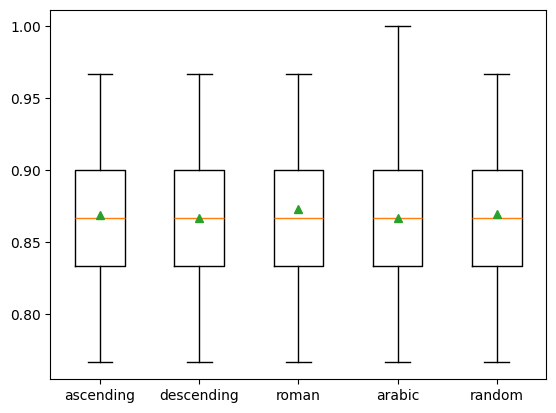

In [73]:
# compare iterative imputation strategies for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random'] 
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()

#### IterativeImputer and Different Number of Iterations

In [74]:
len(results)

5

>1 0.870 (0.052)
>2 0.873 (0.059)
>3 0.870 (0.057)
>4 0.870 (0.057)
>5 0.870 (0.054)
>6 0.874 (0.049)
>7 0.873 (0.057)
>8 0.868 (0.051)
>9 0.872 (0.050)
>10 0.866 (0.050)
>11 0.867 (0.052)
>12 0.873 (0.050)
>13 0.869 (0.053)
>14 0.869 (0.051)
>15 0.873 (0.056)
>16 0.869 (0.054)
>17 0.868 (0.050)
>18 0.870 (0.053)
>19 0.871 (0.053)
>20 0.866 (0.047)


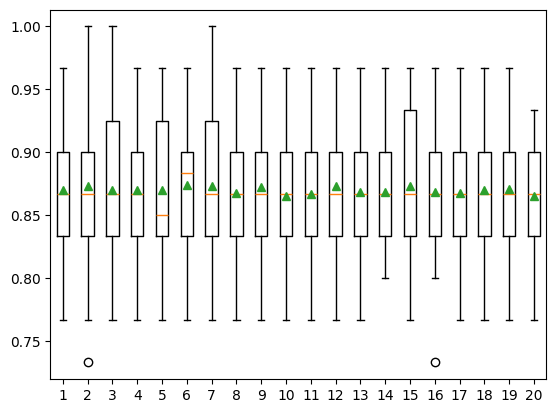

In [75]:
# compare iterative imputation number of iterations for the horse colic dataset from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset 
results = list()
strategies = [str(i) for i in range(1, 21)] 

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=strategies, showmeans=True) 
pyplot.show()


#### IterativeImputer Transform When Making a Prediction

In [76]:
# iterative imputation strategy and prediction for the horse colic dataset from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline 

# load dataset
path_horse_colic= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv"
horse_colic_data = read_csv(path_horse_colic, header=None, na_values='?')

# split into input and output elements
data = horse_colic_data.values
ix = [i for i in range(data.shape[1]) if i != 23] 
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())]) 

# fit the model
pipeline.fit(X, y) 

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan, np.nan, 3, 5, 45.00,
8.40, np.nan, np.nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row]) 

# summarize prediction
print('Predicted Class: %d'  % yhat[0])

Predicted Class: 2


## Feature Selection

### How to Select Categorical Input Features (for Classification)

In [77]:
# example of loading and preparing the breast cancer dataset from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=None)     
    # retrieve array
    dataset = data.values   
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]    
    # format all fields as string
    X = X.astype(str) 
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() 
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train) 
    X_test_enc = oe.transform(X_test) 
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() 
    le.fit(y_train)
    y_train_enc = le.transform(y_train) 
    y_test_enc = le.transform(y_test) 
    return y_train_enc, y_test_enc

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# summarize
print('Train', X_train_enc.shape, y_train_enc.shape) 
print('Test', X_test_enc.shape, y_test_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


#### Chi-Squared Feature Selection

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


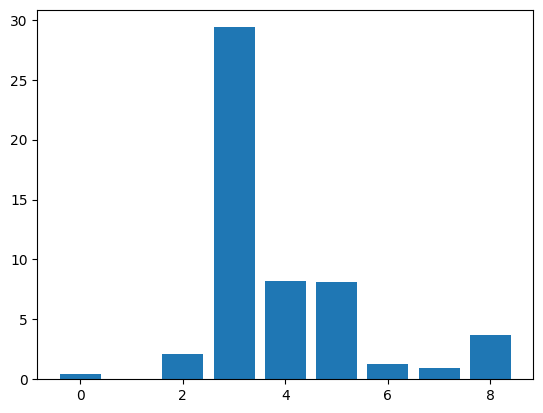

In [78]:
# example of chi squared feature selection for categorical data 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=None)     
    # retrieve array
    dataset = data.values   
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]    
    # format all fields as string
    X = X.astype(str) 
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() 
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train) 
    X_test_enc = oe.transform(X_test) 
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() 
    le.fit(y_train)
    y_train_enc = le.transform(y_train) 
    y_test_enc = le.transform(y_test) 
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test): 
    fs = SelectKBest(score_func=chi2, k='all') 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()


#### Mutual Information Feature Selection

Feature 0: 0.015322
Feature 1: 0.000000
Feature 2: 0.024701
Feature 3: 0.000000
Feature 4: 0.046487
Feature 5: 0.061315
Feature 6: 0.008881
Feature 7: 0.019667
Feature 8: 0.000000


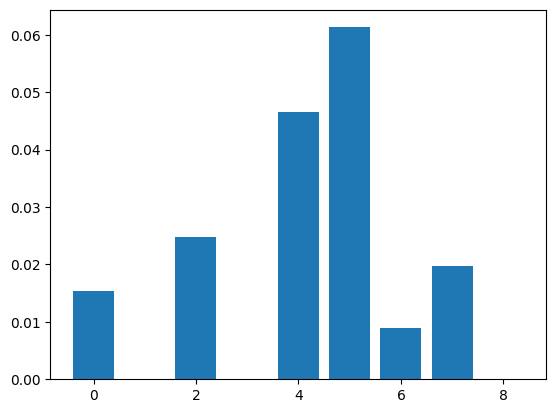

In [79]:
# example of chi squared feature selection for categorical data 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=None)     
    # retrieve array
    dataset = data.values   
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]    
    # format all fields as string
    X = X.astype(str) 
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() 
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train) 
    X_test_enc = oe.transform(X_test) 
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() 
    le.fit(y_train)
    y_train_enc = le.transform(y_train) 
    y_test_enc = le.transform(y_test) 
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test): 
    fs = SelectKBest(score_func=mutual_info_classif, k='all') 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()

#### Modeling With Selected Features - Model Built Using All Features (Baseline)

In [80]:
#evaluation of a model using all input features 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=None)     
    # retrieve array
    dataset = data.values   
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]    
    # format all fields as string
    X = X.astype(str) 
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() 
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train) 
    X_test_enc = oe.transform(X_test) 
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() 
    le.fit(y_train)
    y_train_enc = le.transform(y_train) 
    y_test_enc = le.transform(y_test) 
    return y_train_enc, y_test_enc

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# fit the model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_enc, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_enc) 

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat) 
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 75.79


#### Modeling With Selected Features - Model Built Using Chi-Squared Features

In [81]:
#evaluation of a model using all input features 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=None)     
    # retrieve array
    dataset = data.values   
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]    
    # format all fields as string
    X = X.astype(str) 
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() 
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train) 
    X_test_enc = oe.transform(X_test) 
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() 
    le.fit(y_train)
    y_train_enc = le.transform(y_train) 
    y_test_enc = le.transform(y_test) 
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test): 
    fs = SelectKBest(score_func=chi2, k=4) 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


#### Modeling With Selected Features - Model Built Using Mutual Information Features

In [82]:
#evaluation of a model using all input features 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    # load the dataset
    data = read_csv(filename, header=None)     
    # retrieve array
    dataset = data.values   
    # split into input and output variables
    X = dataset[:, :-1]
    y = dataset[:,-1]    
    # format all fields as string
    X = X.astype(str) 
    return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() 
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train) 
    X_test_enc = oe.transform(X_test) 
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() 
    le.fit(y_train)
    y_train_enc = le.transform(y_train) 
    y_test_enc = le.transform(y_test) 
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test): 
    fs = SelectKBest(score_func=mutual_info_classif, k=4) 
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

# load the dataset
path_breast_cancer_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
X, y = load_dataset(path_breast_cancer_data) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test) 

# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test) 

# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

# fit the model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_fs, y_train_enc)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 73.68


### How to Select Numerical Input Features

In [83]:
# load and summarize the dataset from pandas import read_csv
from sklearn.model_selection import train_test_split

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (514, 8) (514,)
Test (254, 8) (254,)


#### ANOVA F-test Feature Selection

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


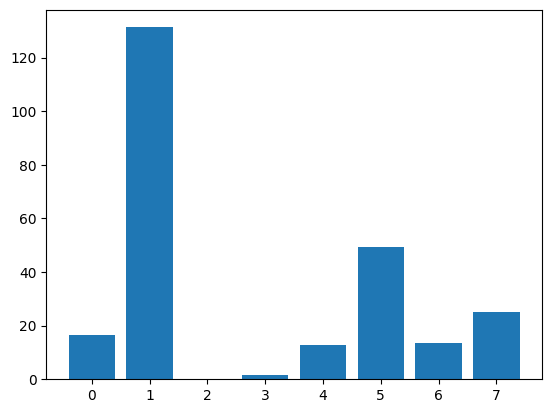

In [84]:
# example of anova f-test feature selection for numerical data 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all') 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()

#### Mutual Information Feature Selection

Feature 0: 0.025578
Feature 1: 0.088535
Feature 2: 0.032740
Feature 3: 0.002998
Feature 4: 0.044981
Feature 5: 0.082367
Feature 6: 0.011278
Feature 7: 0.055919


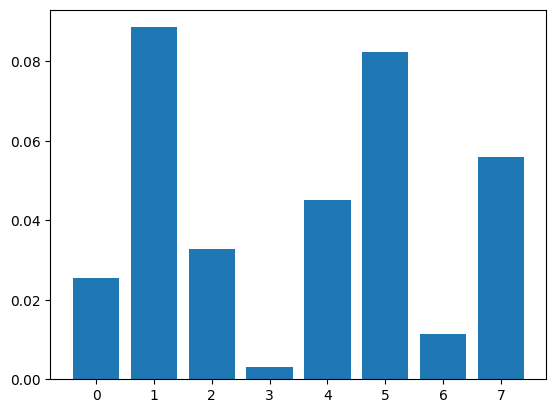

In [85]:
# example of mutual information feature selection for numerical input data 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif 
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all') 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()

#### Modeling With Selected Features - Model Built Using All Features

In [86]:
# evaluation of a model using all input features 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y


# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# fit the model
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 77.56


#### Modeling With Selected Features - Model Built Using ANOVA F-test Features

In [87]:
# evaluation of a model using 4 features chosen with anova f-test 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k=4) 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs
    
# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 78.74


#### Modeling With Selected Features - Model Built Using Mutual Information Features

In [88]:
# evaluation of a model using 4 features chosen with mutual information 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k=4) 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

    
# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LogisticRegression(solver='liblinear') 
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


#### Tune the Number of Selected Features

In [89]:
# compare different numbers of features selected using anova f-test 
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y

# define dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear') 
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)]) 

# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])] 

# define the grid search
search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=cv) 

# perform the search
results = search.fit(X, y) 

# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_) 
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 5}


We might want to see the relationship between the number of selected features and clas- sification accuracy. In this relationship, we may expect that more features result in a better performance to a point. This relationship can be explored by manually evaluating each con- figuration of k for the SelectKBest from 1 to 8, gathering the sample of accuracy scores, and plotting the results using box and whisker plots side-by-side. The spread and mean of these box plots would be expected to show any interesting relationship between the number of selected features and the classification accuracy of the pipeline. The complete example of achieving this is listed below.

>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


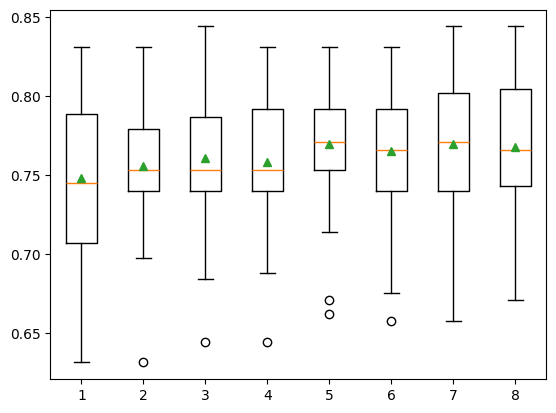

In [90]:
# compare different numbers of features selected using anova f-test 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array 
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1] 
    return X, y

# evaluate a given model using cross-validation 
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
X, y = load_dataset(path_diabetes) 

# define number of features to evaluate 
num_features = [i+1 for i in range(X.shape[1])] 

# enumerate each number of features
results = list()

for k in num_features:
    # create pipeline
    model = LogisticRegression(solver='liblinear') 
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)]) 
    # evaluate the model
    scores = evaluate_model(pipeline) 
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)'  % (k, mean(scores),  std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=num_features, showmeans=True) 
pyplot.show()


### How to Select Features for Numerical Output

In [91]:
# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 

# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize
print('Train', X_train.shape, y_train.shape) 
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


#### Correlation Feature Selection

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

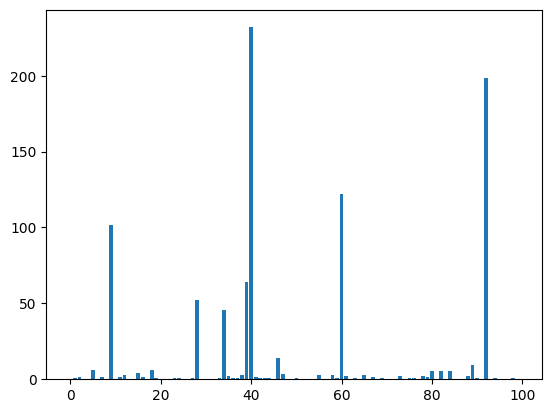

In [92]:
# example of correlation feature selection for numerical data 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all') 
    # learn relationship from training data 
    fs.fit(X_train, y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### Mutual Information Feature Selection

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

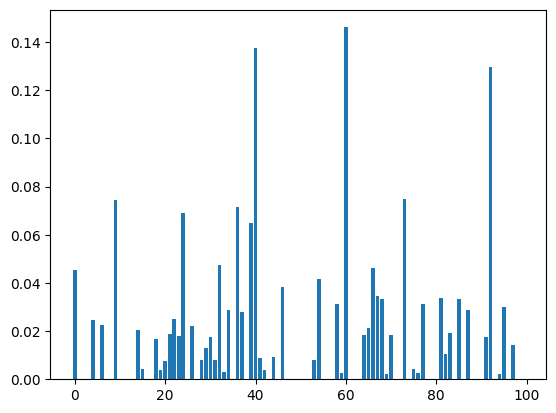

In [93]:
# example of mutual information feature selection for numerical input data 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all') 
    # learn relationship from training data
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs,  X_test_fs,  fs  =  select_features(X_train,  y_train,  X_test) 

# what are scores for the features
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_) 
pyplot.show()

#### Modeling With Selected Features - Model Built Using All Features

In [94]:
# evaluation of a model using all input features 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# fit the model
model = LinearRegression() 
model.fit(X_train,  y_train) 

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.086


#### Modeling With Selected Features - Model Built Using Correlation Features

In [95]:
# evaluation of a model using 10 features chosen with correlation 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=10) 
    # learn relationship from training data 
    fs.fit(X_train,  y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LinearRegression() 
model.fit(X_train_fs,  y_train) 

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)


MAE: 2.740


In [96]:
# evaluation of a model using 88 features chosen with correlation 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=88) 
    # learn relationship from training data 
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LinearRegression() 
model.fit(X_train_fs,  y_train) 

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.085


#### Modeling With Selected Features - Model Built Using Mutual Information Features

In [97]:
# evaluation of a model using 88 features chosen with mutual information 
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=88) 
    # learn relationship from training data
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data 
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LinearRegression()
model.fit(X_train_fs,  y_train) 

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat) 
print('MAE: %.3f' % mae)

MAE: 0.084


#### Tune the Number of Selected Features

In [98]:
# compare different numbers of features selected using mutual information 
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 

# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 

# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression) 
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)]) 

# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)] 

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# perform the search 
results = search.fit(X, y) 

# summarize best
print('Best MAE: %.3f' % results.best_score_) 
print('Best Config: %s' % results.best_params_) 

# summarize all
means = results.cv_results_['mean_test_score'] 
params = results.cv_results_['params']
for mean, param in zip(means, params): 
    print('>%.3f with: %r' % (mean, param))


Best MAE: -0.082
Best Config: {'sel__k': 81}
>-1.100 with: {'sel__k': 80}
>-0.082 with: {'sel__k': 81}
>-0.082 with: {'sel__k': 82}
>-0.082 with: {'sel__k': 83}
>-0.082 with: {'sel__k': 84}
>-0.082 with: {'sel__k': 85}
>-0.082 with: {'sel__k': 86}
>-0.082 with: {'sel__k': 87}
>-0.082 with: {'sel__k': 88}
>-0.083 with: {'sel__k': 89}
>-0.083 with: {'sel__k': 90}
>-0.083 with: {'sel__k': 91}
>-0.083 with: {'sel__k': 92}
>-0.083 with: {'sel__k': 93}
>-0.083 with: {'sel__k': 94}
>-0.083 with: {'sel__k': 95}
>-0.083 with: {'sel__k': 96}
>-0.083 with: {'sel__k': 97}
>-0.083 with: {'sel__k': 98}
>-0.083 with: {'sel__k': 99}
>-0.083 with: {'sel__k': 100}


We might want to see the relationship between the number of selected features and MAE. In this relationship, we may expect that more features result in better performance, to a point. This relationship can be explored by manually evaluating each configuration of k for the SelectKBest from 81 to 100, gathering the sample of MAE scores, and plotting the results using box and whisker plots side by side. The spread and mean of these box plots would be expected to show any interesting relationship between the number of selected features and the MAE of the pipeline. Note that we started the spread of k values at 81 instead of 80 because the distribution of MAE scores for k=80 is dramatically larger than all other values of k considered and it washed out the plot of the results on the graph. The complete example of achieving this is listed below.

>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


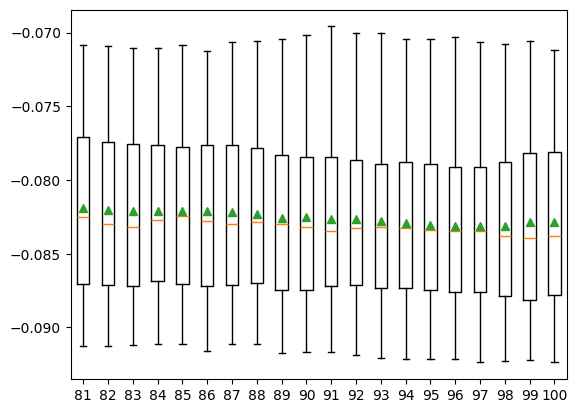

In [99]:
#compare different numbers of features selected using mutual information 
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)

# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)] 

# enumerate each number of features
results = list()

for k in num_features:
    # create pipeline
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression, k=k) 
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    
    # evaluate the model
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    results.append(scores)  

    # summarize the results
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores))) 
    
# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=num_features, showmeans=True) 
pyplot.show()


### How to Use RFE for Feature Selection

#### RFE for Classification

In [100]:
# evaluate RFE for classification 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
model = DecisionTreeClassifier()
pipeline    =    Pipeline(steps=[('s',rfe),('m',model)]) 

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.031)


We can also use the RFE model pipeline as a final model and make predictions for classifica- tion. First, the RFE and model are fit on all available data, then the predict() function can be called to make predictions on new data. The example below demonstrates this on our binary classification dataset.

In [101]:
# make a prediction with an RFE pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)]) 

# fit the model on all available data 
pipeline.fit(X, y)

# make a prediction for one example
data = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057,-2.48924933, -1.93094078, 3.26130366, 2.05692145]]

yhat = pipeline.predict(data) 
print(f'Predicted Class: {yhat[0]}')

Predicted Class: 1


#### RFE for Regression

In [102]:
# evaluate RFE for regression 
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5) 
model = DecisionTreeRegressor()
pipeline    =    Pipeline(steps=[('s',rfe),('m',model)]) 

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.253 (3.054)


We can also use the RFE as part of the final model and make predictions for regression. First, the Pipeline is fit on all available data, then the predict() function can be called to make predictions on new data. The example below demonstrates this on our regression dataset.

In [103]:
# make a regression prediction with an RFE pipeline 
from sklearn.datasets import make_regression
from  sklearn.feature_selection  import  RFE
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5) 
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit the model on all available data 
pipeline.fit(X, y)

# make a prediction for one example
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381,0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = pipeline.predict(data) 
print(f'Predicted Class: {round(yhat[0],3)}')

Predicted Class: -84.288


#### RFE  Hyperparameters - Explore Number of Features

>2 0.717 (0.046)
>3 0.817 (0.036)
>4 0.876 (0.035)
>5 0.887 (0.030)
>6 0.893 (0.026)
>7 0.888 (0.025)
>8 0.887 (0.025)
>9 0.882 (0.030)


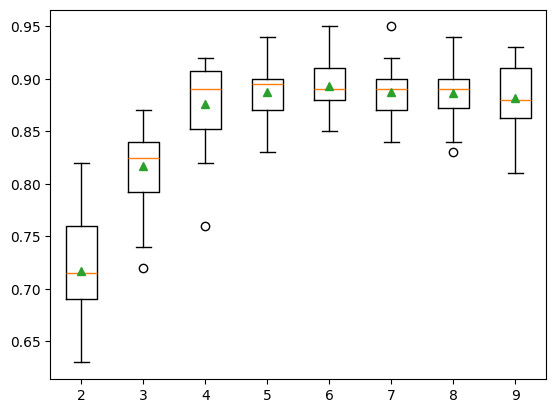

In [104]:
# explore the number of selected features for RFE 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
    
# get a list of models to evaluate 
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i) 
        model = DecisionTreeClassifier()
        models[str(i)]  =  Pipeline(steps=[('s',rfe),('m',model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores
    
# define dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results
results, names =  list(),  list() 

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()


#### RFE  Hyperparameters - Automatically Select the Number of Features

In [105]:
# automatically select the number of features for RFE 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier()) 
model = DecisionTreeClassifier()
pipeline    =    Pipeline(steps=[('s',rfe),('m',model)]) 

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.882 (0.027)


#### RFE  Hyperparameters - Which Features Were Selected

In [106]:
# report which features were selected by RFE 
from sklearn.datasets import make_classification 
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 

# fit RFE
rfe.fit(X, y)

# summarize all features 
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 6
Column: 1, Selected=False, Rank: 4
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 5
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 3


#### RFE  Hyperparameters - Explore Base Algorithm

>lr 0.890 (0.030)
>per 0.847 (0.040)
>cart 0.888 (0.035)
>rf 0.860 (0.040)
>gbm 0.890 (0.032)


/tmp/ipykernel_7126/542930258.py:72: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=names, showmeans=True)


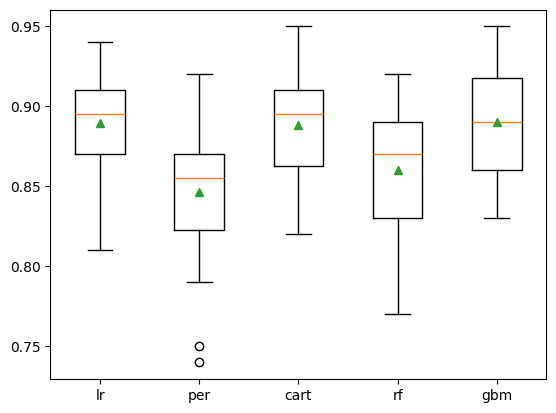

In [107]:
# explore the algorithm wrapped by RFE 
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y
    
# get a list of models to evaluate 
def get_models():
    models = dict() 
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['per']  =  Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['rf']  =  Pipeline(steps=[('s',rfe),('m',model)]) 
    
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5) 
    model = DecisionTreeClassifier()
    models['gbm']   =   Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, labels=names, showmeans=True) 
pyplot.show()

### How to Use Feature Importance

#### Coefficients as Feature Importance - Linear Regression Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


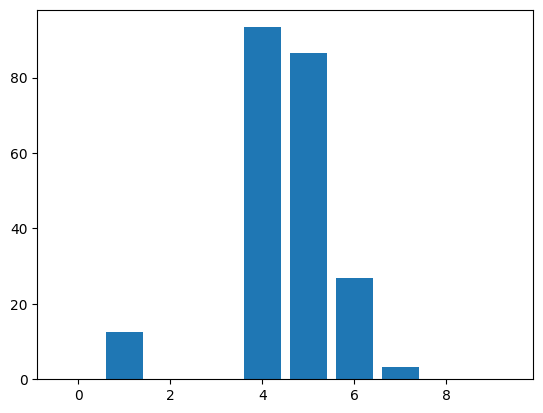

In [108]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = LinearRegression() 

# fit the model 
model.fit(X, y)

# get importance 
importance = model.coef_

# summarize feature importance 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Coefficients as Feature Importance - Logistic Regression Feature Importance

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


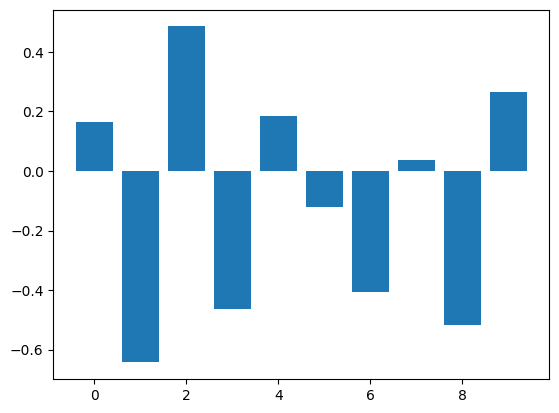

In [109]:
# logistic regression for feature importance 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = LogisticRegression() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.coef_[0]

# summarize feature importance 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) 

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Decision Tree Feature Importance - CART Regression Feature Importance

Feature: 0, Score: 0.00243
Feature: 1, Score: 0.00486
Feature: 2, Score: 0.00147
Feature: 3, Score: 0.00194
Feature: 4, Score: 0.51743
Feature: 5, Score: 0.43760
Feature: 6, Score: 0.02745
Feature: 7, Score: 0.00261
Feature: 8, Score: 0.00256
Feature: 9, Score: 0.00164


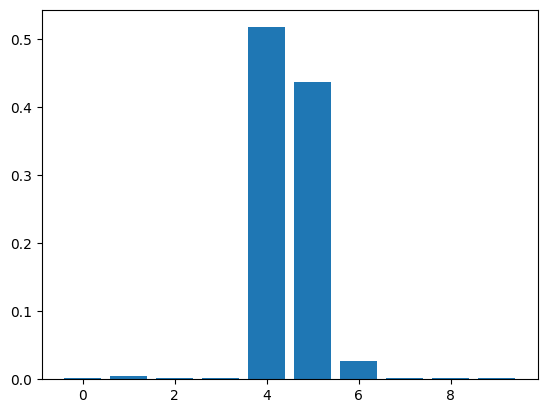

In [110]:
# decision tree for feature importance on a regression problem 
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = DecisionTreeRegressor() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Decision Tree Feature Importance - CART Classification Feature Importance

Feature: 0, Score: 0.02204
Feature: 1, Score: 0.01379
Feature: 2, Score: 0.18264
Feature: 3, Score: 0.30200
Feature: 4, Score: 0.08124
Feature: 5, Score: 0.00800
Feature: 6, Score: 0.16248
Feature: 7, Score: 0.02461
Feature: 8, Score: 0.14119
Feature: 9, Score: 0.06201


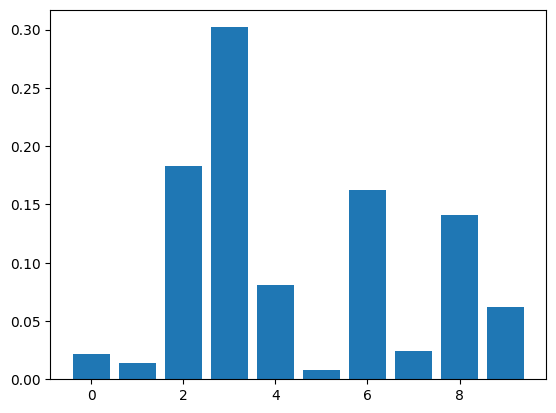

In [111]:
# decision tree for feature importance on a classification problem 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = DecisionTreeClassifier() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Random Forest Regression Feature Importance

Feature: 0, Score: 0.00284
Feature: 1, Score: 0.00572
Feature: 2, Score: 0.00281
Feature: 3, Score: 0.00294
Feature: 4, Score: 0.53173
Feature: 5, Score: 0.41872
Feature: 6, Score: 0.02633
Feature: 7, Score: 0.00314
Feature: 8, Score: 0.00312
Feature: 9, Score: 0.00264


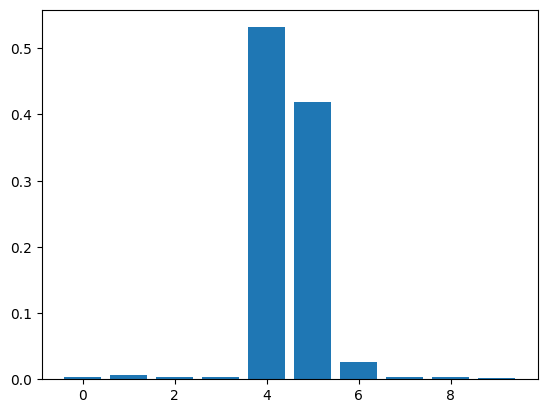

In [112]:
# random forest for feature importance on a regression problem 
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = RandomForestRegressor() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Random Forest Classification Feature Importance

Feature: 0, Score: 0.07231
Feature: 1, Score: 0.12291
Feature: 2, Score: 0.14998
Feature: 3, Score: 0.18452
Feature: 4, Score: 0.08553
Feature: 5, Score: 0.10908
Feature: 6, Score: 0.10067
Feature: 7, Score: 0.04969
Feature: 8, Score: 0.08480
Feature: 9, Score: 0.04049


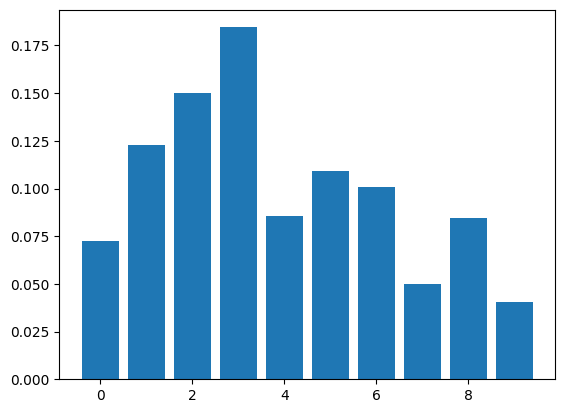

In [113]:
# random forest for feature importance on a classification problem 
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = RandomForestClassifier() 

# fit the model
model.fit(X, y) 

# get importance
importance = model.feature_importances_ 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Permutation Feature Importance for Regression

Permutation feature importance is a technique for calculating relative importance scores that is **independent** of the model used. <br><br>First, a model is fit on the dataset, such as a model that does not support native feature importance scores. <br><br>Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. <br><br>This is repeated for each feature in the dataset. <br>Then this whole process is repeated 3, 5, 10 or more times. <br>The result is a **mean importance score for each input feature** (and distribution of scores given the repeats).

Feature: 0, Score: 116.66920
Feature: 1, Score: 327.25419
Feature: 2, Score: 158.70208
Feature: 3, Score: 97.38508
Feature: 4, Score: 10114.18398
Feature: 5, Score: 7903.29299
Feature: 6, Score: 907.95359
Feature: 7, Score: 137.79050
Feature: 8, Score: 104.67687
Feature: 9, Score: 137.78849


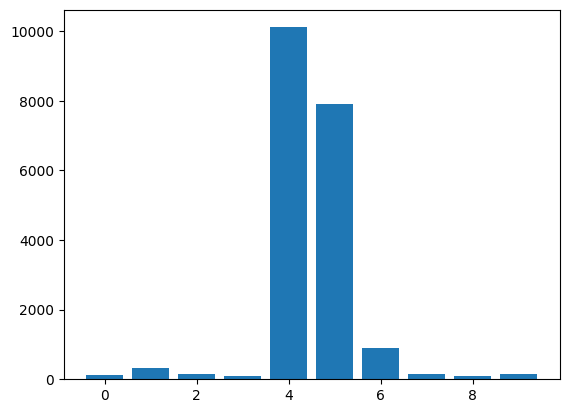

In [114]:
# permutation feature importance with knn for regression 
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.inspection import permutation_importance 
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1) 

# define the model
model = KNeighborsRegressor() 

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error') 

# get importance
importance = results.importances_mean 

# summarize feature importance
for i,v in enumerate(importance): 
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Permutation Feature Importance for Classification

Feature: 0, Score: 0.04900
Feature: 1, Score: 0.06000
Feature: 2, Score: 0.05100
Feature: 3, Score: 0.09400
Feature: 4, Score: 0.05320
Feature: 5, Score: 0.05860
Feature: 6, Score: 0.06960
Feature: 7, Score: 0.05480
Feature: 8, Score: 0.05520
Feature: 9, Score: 0.02940


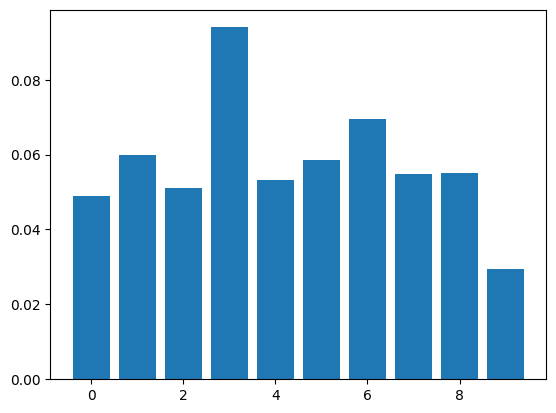

In [115]:
# permutation feature importance with knn for classification 
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.inspection import permutation_importance 
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# define the model
model = KNeighborsClassifier() 

# fit the model
model.fit(X, y)

# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy') 

# get importance
importance = results.importances_mean 

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance) 
pyplot.show()

#### Feature Selection with Importance

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model. <br>We can demonstrate this with a small example. <br>Recall, our synthetic dataset has 1,000 examples each with 10 input variables, five of which are redundant and five of which are important to the outcome. <br>We can use feature importance scores to help select the five variables that are relevant and only use them as inputs to a predictive model.

#### Feature Selection with Importance - Example of evaluating a model with all selected features.

First, we can split the training dataset into train and test sets and train a model on the training dataset, make predictions on the test set and evaluate the result using classification accuracy. <br>We will use a logistic regression model as the predictive model. <br>This **provides a baseline for comparison** when we remove some features using feature importance scores. <br>The complete example of evaluating a logistic regression model using **all features** as input on our synthetic dataset is listed below.

In [116]:
# evaluation of a model using all features
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# fit the model
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


#### Feature Selection with Importance - Example of evaluating a model with feature selection performed using feature importance.

Given that we created the dataset to have 5 informative features, we would expect better or the same results with half the number of input variables. <br>**We could use any of the feature importance scores explored above**, but in this case we will use the feature importance scores provided by random forest. <br>We can use the **SelectFromModel class** to define both the model we wish to calculate importance scores, RandomForestClassifier in this case, and the number of features to select, 5 in this case.

In [117]:
#evaluation of a model using 5 features chosen with random forest importance 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5) 
    # learn relationship from training data
    fs.fit(X_train,  y_train)
    # transform train input data 
    X_train_fs = fs.transform(X_train) 
    # transform test input data
    X_test_fs = fs.transform(X_test) 
    return X_train_fs, X_test_fs, fs

# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

# fit the model
model = LogisticRegression(solver='liblinear') 
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


In this case, we can see that the model achieves the **same performance on the dataset**, **although with half the number of input features**. <br>As expected, the feature importance scores calculated by random forest allowed us **to accurately rank the input features** and **delete those that were not relevant to the target variable**.

## Data Transforms

### How to Scale Numerical Data

#### Numerical Data Scaling Methods - Data Normalization

In [118]:
# example of a normalization 
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler 

# define data
data = asarray([[100, 0.001], [8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])

print(data)

# define min max scaler 
scaler = MinMaxScaler() 

# transform data
scaled = scaler.fit_transform(data) 
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


#### Numerical Data Scaling Methods - Data Standardization

In [119]:
# example of a standardization 
from numpy import asarray
from sklearn.preprocessing import StandardScaler 

# define data
data = asarray([[100, 0.001], [8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])

print(data)

# define standard scaler 
scaler = StandardScaler() 

# transform data
scaled = scaler.fit_transform(data) 
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


#### Diabetes Dataset

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

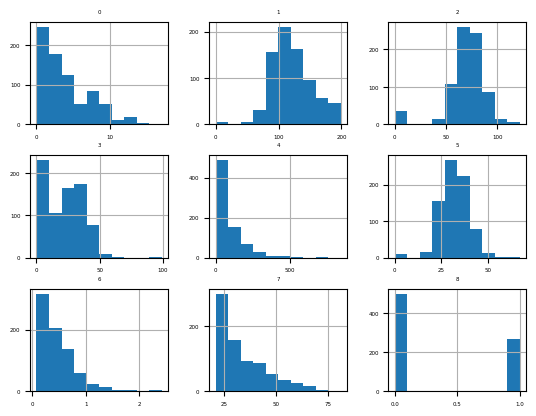

In [120]:
# load and summarize the diabetes dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. The complete example is listed below.

In [121]:
# evaluate knn on the raw diabetes dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier() 

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


#### MinMaxScaler Transform

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

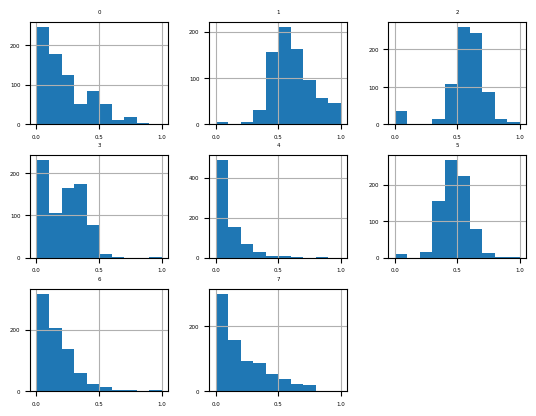

In [122]:
# visualize a minmax scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset 
trans = MinMaxScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# summarize 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a MinMaxScaler transform of the dataset. The complete example is listed below.

In [123]:
# evaluate knn on the diabetes dataset with minmax scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = MinMaxScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


#### StandardScaler Transform

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

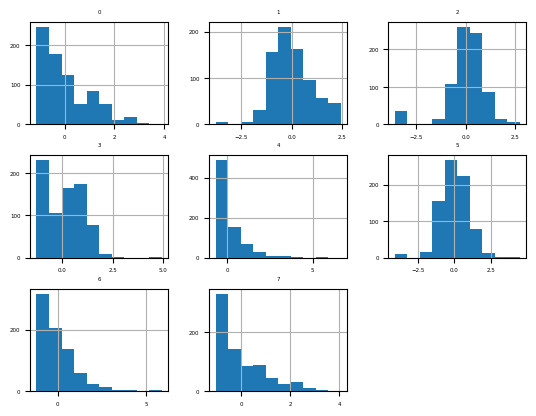

In [124]:
# visualize a standard scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)
# summarize 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a StandardScaler transform of the dataset. The complete example is listed below.

In [125]:
# evaluate knn on the diabetes dataset with standard scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = StandardScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


### How to Scale Data With Outliers

#### Diabetes Dataset

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

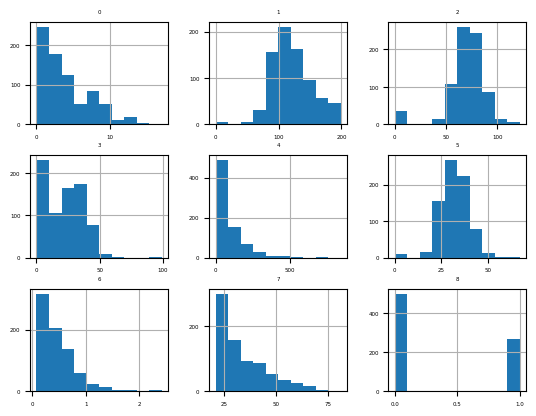

In [126]:
# load and summarize the diabetes dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# summarize the shape of the dataset
print(dataset.shape)

# summarize each variable 
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [127]:
# evaluate knn on the raw diabetes dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load the dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier() 

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


#### IQR Robust Scaler Transform

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

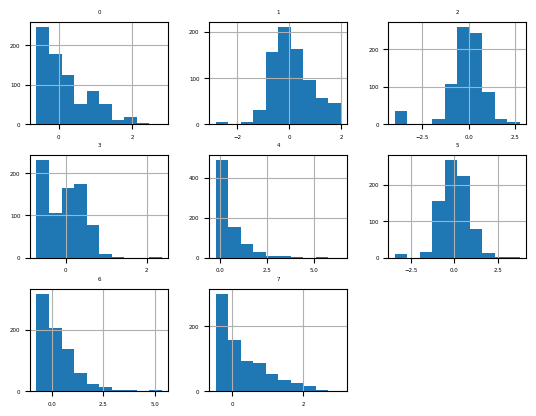

In [128]:
# visualize a robust scaler transform of the diabetes dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler 
from matplotlib import pyplot

# load dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset 
trans = RobustScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data) 

# summarize
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Next, let’s evaluate the same KNN model as the previous section, but in this case on a robust scaler transform of the dataset. <br>The complete example is listed below.

In [129]:
# evaluate knn on the diabetes dataset with robust scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import RobustScaler 
from sklearn.pipeline import Pipeline

# load dataset
path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
dataset = read_csv(path_diabetes, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = RobustScaler()
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


Next, let’s explore the effect of different scaling ranges.

#### Explore Robust Scaler Range

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


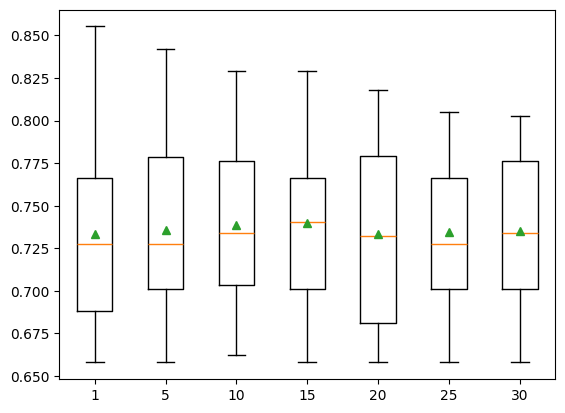

In [130]:
# explore the scaling range of the robust scaler transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    # load dataset
    path_diabetes= "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
    dataset = read_csv(path_diabetes, header=None)     
    data = dataset.values
    # separate into input and output columns
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate 
def get_models():
    models = dict()
    for value in [1, 5, 10, 15, 20, 25, 30]:
        # define the pipeline
        trans = RobustScaler(quantile_range=(value, 100-value)) 
        model = KNeighborsClassifier()
        models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores


# define dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()

### How to Encode Categorical Data

#### Ordinal Encoding

In [131]:
# example of a ordinal encoding 
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder 

# define data
data = asarray([['red'], ['green'], ['blue']]) 
print(data)

# define ordinal encoding 
encoder = OrdinalEncoder() 

# transform data
result = encoder.fit_transform(data) 

print(result)

[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


#### One Hot Encoding

In [132]:
# example of a one hot encoding 
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder 

# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)

# define one hot encoding
encoder = OneHotEncoder(sparse_output=False) 

# transform data
onehot = encoder.fit_transform(data) 

print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


#### Dummy Variable Encoding

In [133]:
# example of a dummy variable encoding 
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder 

# define data
data = asarray([['red'], ['green'], ['blue']]) 
print(data)

# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse_output=False) 

# transform data
onehot = encoder.fit_transform(data) 

print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 1.]
 [1. 0.]
 [0. 0.]]


#### Breast Cancer Dataset

In [134]:
# load and summarize the dataset 
from pandas import read_csv

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str) 

# summarize
print('Input', X.shape) 
print('Output', y.shape)

Input (286, 9)
Output (286,)


#### OrdinalEncoder Transform

In [135]:
# ordinal encode the breast cancer dataset 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder 

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# ordinal encode input variables 
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X) 

# ordinal encode target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

# summarize the transformed data 
print('Input', X.shape) 
print(X[:5, :])

print('Output', y.shape) 
print(y[:5])

Input (286, 9)
[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]
Output (286,)
[1 0 1 0 1]


We can then fit a logistic regression algorithm on the training dataset and evaluate it on the test dataset. The complete example is listed below.

In [136]:
#evaluate logistic regression on the breast cancer dataset with an ordinal encoding 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import accuracy_score

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# ordinal encode input variables
ordinal_encoder = OrdinalEncoder() 
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train) 
X_test = ordinal_encoder.transform(X_test)

# ordinal encode target variable 
label_encoder = LabelEncoder() 
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train) 
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression() 

# fit on the training set
model.fit(X_train, y_train)

# predict on test set
yhat = model.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


#### OneHotEncoder Transform

In [137]:
# one-hot encode the breast cancer dataset 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# one hot encode input variables 
onehot_encoder = OneHotEncoder(sparse_output=False)
X = onehot_encoder.fit_transform(X) 

# ordinal encode target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

# summarize the transformed data 
print('Input', X.shape) 
print(X[:5, :])

Input (286, 43)
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


Next, let’s evaluate machine learning on this dataset with this encoding as we did in the previous section. The encoding is fit on the training set then applied to both train and test sets as before.

In [138]:
# evaluate logistic regression on the breast cancer dataset with a one-hot encoding 
from pandas import read_csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# load the dataset
path_breast_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
dataset = read_csv(path_breast_data, header=None) 

# retrieve the array of data
data = dataset.values

# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# one-hot encode input variables
onehot_encoder = OneHotEncoder() 
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train) 
X_test = onehot_encoder.transform(X_test)

# ordinal encode target variable 
label_encoder = LabelEncoder() 
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train) 
y_test = label_encoder.transform(y_test)

# define the model
model = LogisticRegression() 

# fit on the training set 
model.fit(X_train,  y_train) 

# predict on test set
yhat = model.predict(X_test) 

# evaluate predictions
accuracy = accuracy_score(y_test, yhat) 
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53


### How to Make Distributions More Gaussian

✅ Key Takeaways (Summary) <br>
- **Gaussian-shaped data boosts model performance.**
- **Power transforms** help achieve Gaussian-like distributions:
- Use **Box-Cox** for strictly positive data.
- Use **Yeo-Johnson** for general-purpose transformation.
- PowerTransformer in scikit-learn makes applying these easy and consistent.
- Combine with **pipelines** for scalable, reusable data preparation workflows.

#### Power transforms

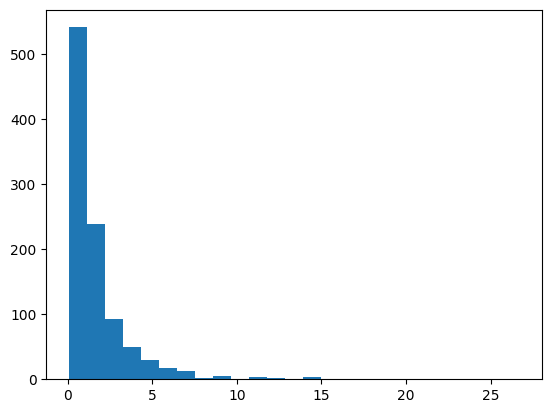

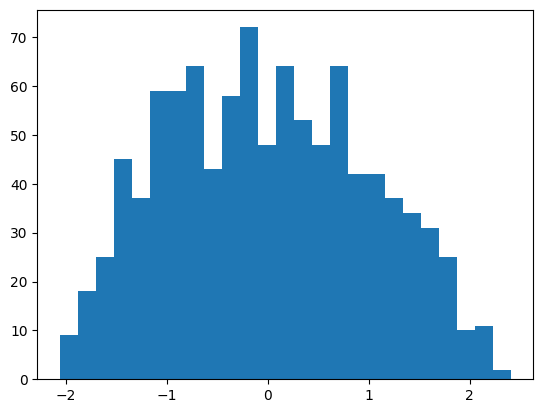

In [139]:
# demonstration of the power transform on data with a skew 
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer 
from matplotlib import pyplot

# generate gaussian data sample 
data = randn(1000)

# add a skew to the data distribution 
data = exp(data)

# histogram of the raw data with a skew 
pyplot.hist(data,  bins=25) 
pyplot.show()

# reshape data to have rows and columns 
data  =  data.reshape((len(data),1))

# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True) 
data_trans = power.fit_transform(data)

# histogram of the transformed data
pyplot.hist(data_trans, bins=25) 
pyplot.show()

#### Sonar dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


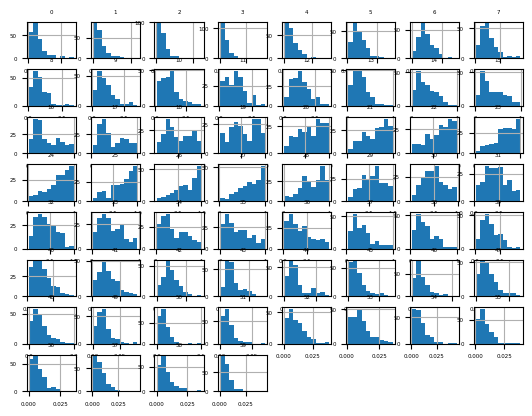

In [140]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()


Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [141]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Box-Cox Transform

The Box-Cox transform is named for the two authors of the method. **It is a power transform that assumes the values of the input variable to which it is applied are strictly positive**. That means **0 and negative values are not supported**.

In [142]:
# # visualize a box-cox transform of the sonar dataset 
# from pandas import read_csv
# from pandas import DataFrame
# from sklearn.preprocessing import PowerTransformer 
# from matplotlib import pyplot

# # Load dataset
# path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
# dataset = read_csv(path_sonar_data, header=None) 

# # retrieve just the numeric input values 
# data = dataset.values[:, :-1]

# # perform a box-cox transform of the dataset 
# pt = PowerTransformer(method='box-cox')

# # NOTE: we expect this to cause an error!!! 
# data = pt.fit_transform(data)

# # convert the array back to a dataframe 
# dataset = DataFrame(data)

# # histograms of the variables
# fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
# [x.title.set_size(4) for x in fig.ravel()]
# # show the plot 
# pyplot.show()

**NOTE: we expect this to cause an error!!!**

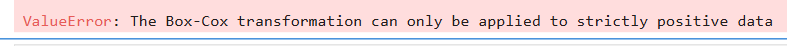

As expected, **we cannot use the transform on the raw data because it is not strictly positive**.<br> One way to solve this problem is to use a **MixMaxScaler** transform **first** to **scale the data to positive values**, **then** apply the transform. <br>We can use a Pipeline object to apply both transforms in sequence; for example:

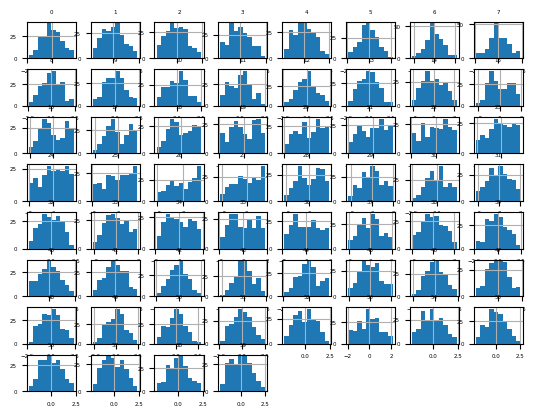

In [143]:
# visualize a box-cox transform of the scaled sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot 

# Load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a box-cox transform of the dataset 
scaler = MinMaxScaler(feature_range=(1, 2)) 
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)]) 
data = pipeline.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()] 

# show the plot
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable looks more Gaussian than the raw data.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a Box-Cox transform of the scaled dataset. The complete example is listed below.

In [144]:
# evaluate knn on the box-cox sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2)) 
power = PowerTransformer(method='box-cox') 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


Running the example, we can see that the Box-Cox transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.1 percent with the transform.

#### Yeo-Johnson Transform

Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive. **It supports zero values and negative values**. This means we can apply it to our dataset without scaling it first. We can apply the transform by defining a PowerTransformer object and setting the method argument to ‘yeo-johnson’ (the default).

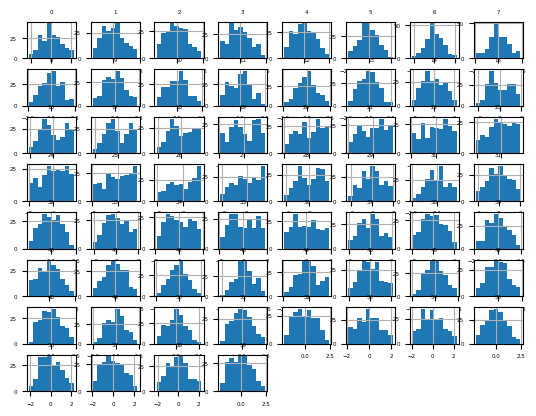

In [145]:
# visualize a yeo-johnson transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer 
from matplotlib import pyplot

# Load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a yeo-johnson transform of the dataset 
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable look more Gaussian than the raw data, much like the Box-Cox transform.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a Yeo-Johnson transform of the raw dataset. The complete example is listed below.

In [146]:
# evaluate knn on the yeo-johnson sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PowerTransformer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
power = PowerTransformer(method='yeo-johnson') 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('p', power), ('m', model)])

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


Running the example, we can see that the Yeo-Johnson transform results in a lift in performance from 79.7 percent accuracy without the transform to about 80.8 percent with the transform, less than the Box-Cox transform that achieved about 81.1 percent.

Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform. We can explore this **by adding a StandardScaler** as a first step in the pipeline. The complete example is listed below.

In [147]:
#evaluate knn on the yeo-johnson standardized sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson') 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


### How to Change Numerical Data Distributions

Numerical input variables may have a highly skewed or non-standard distribution. This could be caused by outliers in the data, multi-modal distributions, highly exponential distributions, and more. Many machine learning algorithms prefer or perform better when numerical input variables and even output variables in the case of regression have a standard probability distribution, such as a Gaussian (normal) or a uniform distribution.
The quantile transform provides an automatic way to transform a numeric input variable to have a different data distribution, which in turn, can be used as input to a predictive model. In this tutorial, you will discover how to use quantile transforms to change the distribution of numeric variables for machine learning. 

🧠 **Core Idea**
- Machine learning algorithms often perform better with numerical features following a standard distribution, like Gaussian (normal) or uniform.

🔁 **Why Change Data Distributions?**
- Real-world data often has:  **Skewed distributions** (e.g., exponential), **Outliers**, **Multi-modal distributions**
- Algorithms like **linear/logistic regression** assume Gaussian inputs.
- **Even non-linear models can benefit from normalized inputs.**

🔧 **Quantile Transform**
- **Goal**: Map any distribution to **Gaussian** or **uniform**.
- Uses **Quantile Function (inverse CDF)**.
- Implemented in scikit-learn via QuantileTransformer.
- Parameters:
- **output_distribution**: 'normal' or 'uniform'
- **n_quantiles**: resolution of mapping (default: 1000; must be < sample size)

✅ **Key Takeaways**
- Normalize data using quantile transforms for better learning.
- Try both **normal** and **uniform** output distributions.
- Always **experiment with n_quantiles** to optimize performance.

#### Quantile Transforms

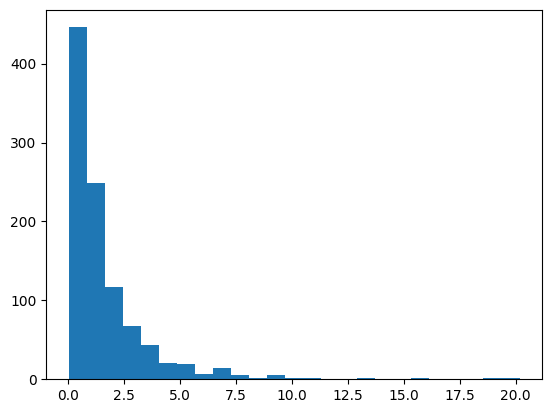

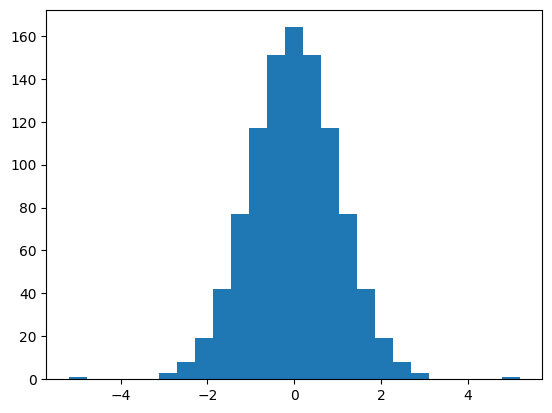

In [148]:
# demonstration of the quantile transform 
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer 
from matplotlib import pyplot

# generate gaussian data sample
data = randn(1000)

# add a skew to the data distribution 
data = exp(data)

# histogram of the raw data with a skew 
pyplot.hist(data,  bins=25) 
pyplot.show()

# reshape data to have rows and columns 
data  =  data.reshape((len(data),1))

# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal') 
data_trans = quantile.fit_transform(data)

# histogram of the transformed data 
pyplot.hist(data_trans, bins=25) 
pyplot.show()

Running the example first creates a sample of 1,000 random Gaussian values and adds a skew to the dataset. A histogram is created from the skewed dataset and clearly shows the distribution pushed to the far left.

Then a QuantileTransformer is used to map the data to a Gaussian distribution and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0. A histogram of the transform data is created showing a Gaussian shaped data distribution.

#### Sonar Dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


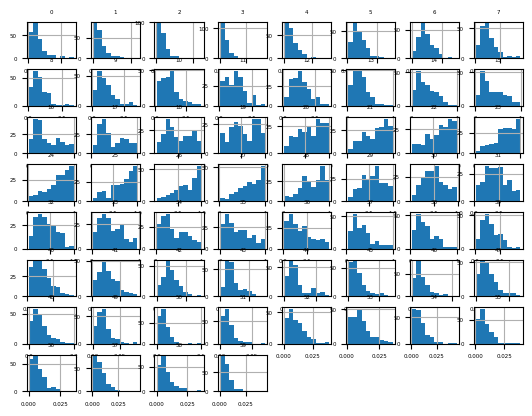

In [149]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [150]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Normal Quantile Transform

It is often desirable to transform an input variable to have a normal probability distribu- tion to improve the modeling performance. We can apply the Quantile transform using the QuantileTransformer class and set the output distribution argument to ‘normal’. We must also set the n quantiles argument to a value less than the number of observations in the training dataset, in this case, 100. Once defined, we can call the fit transform() function and pass it to our dataset to create a quantile transformed version of our dataset.

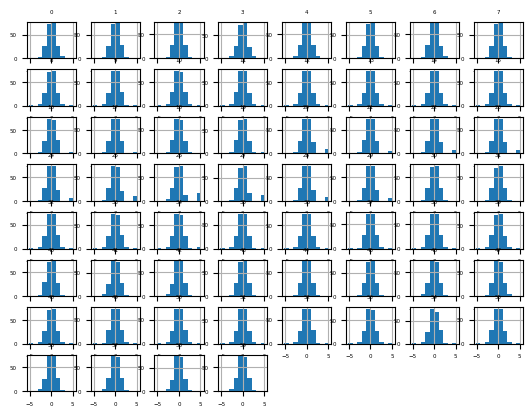

In [151]:
# visualize a normal quantile transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal') 
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable looks very Gaussian as compared to the raw data.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a normal quantile transform of the dataset. The complete example is listed below.

In [152]:
# evaluate knn on the sonar dataset with normal quantile transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.817 (0.087)


Running the example, we can see that the normal quantile transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.7 percent with the transform.

#### Uniform Quantile Transform

Sometimes it can be beneficial to transform a highly exponential or multi-modal distribution to have a uniform distribution. This is especially useful for data with a large and sparse range of values, e.g. outliers that are common rather than rare. We can apply the transform by defining a QuantileTransformer class and setting the output distribution argument to ‘uniform’ (the default).

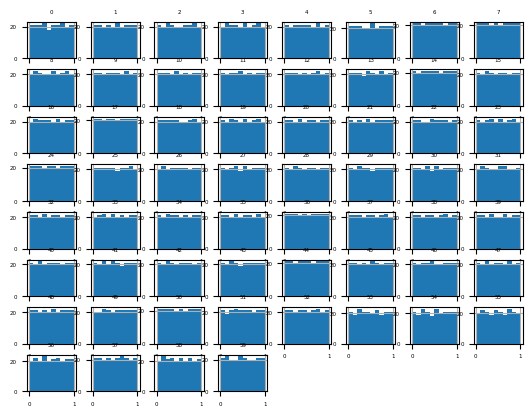

In [153]:
# visualize a uniform quantile transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform') 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms for each variable looks very uniform compared to the raw data.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a uniform quantile transform of the raw dataset. The complete example is listed below.

In [154]:
# evaluate knn on the sonar dataset with uniform quantile transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)


Running the example, we can see that the uniform transform results in a lift in performance from 79.7 percent accuracy without the transform to about 84.5 percent with the transform, better than the normal transform that achieved a score of 81.7 percent.

We chose the number of quantiles as an arbitrary number, in this case, 100. This hyperpa- rameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model. The example below performs this experiment and plots the mean accuracy for different n quantiles values from 1 to 99.

>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

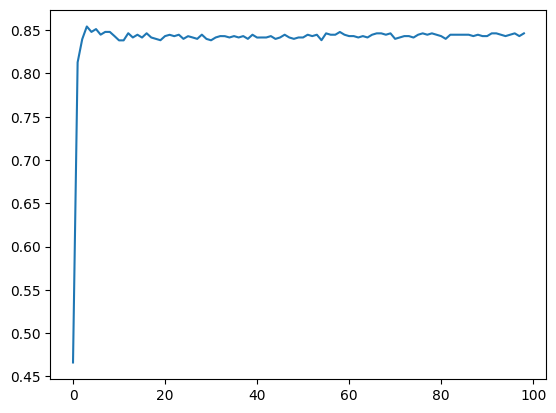

In [155]:
# explore number of quantiles on classification accuracy 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None)
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,100):
        # define the pipeline
        trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform') 
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores
    
# define dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
X, y = get_dataset(path_sonar_data) 

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results = list()

for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(mean(scores))
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores))) 

# plot model performance for comparison
pyplot.plot(results) 
pyplot.show()

In this case, we can see that surprisingly smaller values resulted in better accuracy, with values such as 4 achieving an accuracy of about 85.4 percent.

A line plot is created showing the number of quantiles used in the transform versus the classification accuracy of the resulting model. We can see a bump with values less than 10 and drop and flat performance after that. <br>**The results highlight that there is likely some benefit in exploring different distributions and number of quantiles to see if better performance can be achieved.**

### How to Transform Numerical to Categorical Data

🔷 **Why Transform Numerical to Categorical (Discretization)?**
- Numerical variables may have **skewed or complex distributions** (e.g., outliers, exponential, multi-modal).
- **ML models perform better** when inputs have **standard or discrete distributions**.
- Some models (e.g., decision trees) prefer **ordinal or categorical inputs**.

🔷 **What is Discretization?**
- Converts **numeric variables into discrete ordinal categories** (a process also known as **binning**).
- Helps **simplify relationships** and **improve performance** of models.
- Can be applied to **inputs or outputs** (features or targets).

🔷 **Best Practices**
- Always experiment with different **n_bins** values; optimal performance often requires tuning.
- For ordinal relationships, **ordinal encoding** is preferred.
- For capturing non-ordinal relationships (e.g., kmeans), **onehot encoding** may help.
- Apply discretization **after train-test split** to avoid data leakage.

#### Discretization Transforms

Different methods for grouping the values into k discrete bins can be used; common techniques include:
- **Uniform**: Each bin has the same width in the span of possible values for the variable.
- **Quantile**: Each bin has the same number of values, split based on percentiles.
- **Clustered**: Clusters are identified and examples are assigned to each group.<br><br>
The discretization transform is available in the scikit-learn Python machine learning library via the KBinsDiscretizer class. 

We can demonstrate the KBinsDiscretizer with a small worked example. We can generate a sample of random Gaussian numbers. The KBinsDiscretizer can then be used to convert the floating values into fixed number of discrete categories with an ranked ordinal relationship. The complete example is listed below.

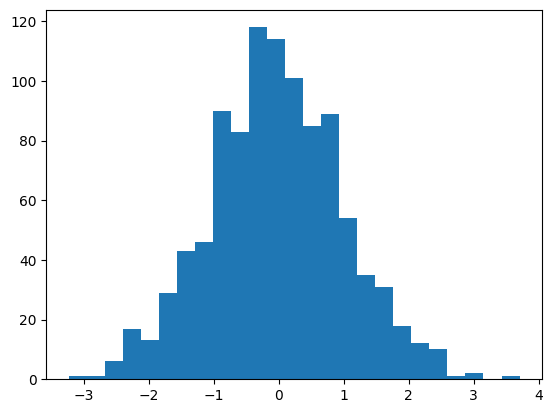

[[7.]
 [5.]
 [2.]
 [3.]
 [7.]
 [2.]
 [3.]
 [7.]
 [3.]
 [3.]]


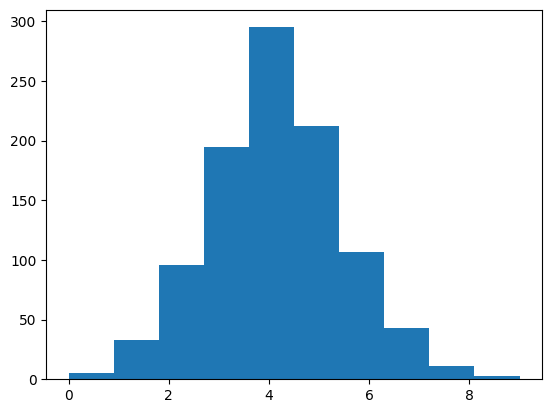

In [156]:
# demonstration of the discretization transform 
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# generate gaussian data sample 
data = randn(1000)

# histogram of the raw data 
pyplot.hist(data, bins=25) 
pyplot.show()

# reshape data to have rows and columns 
data  =  data.reshape((len(data),1))

# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=200_000) 
data_trans = kbins.fit_transform(data)

# summarize first few rows 
print(data_trans[:10, :])

# histogram of the transformed data 
pyplot.hist(data_trans, bins=10) 
pyplot.show()

Running the example first creates a sample of 1,000 random Gaussian floating-point values and plots the data as a histogram.

Next the KBinsDiscretizer is used to map the numerical values to categorical values. We configure the transform to create 10 categories (0 to 9), to output the result in ordinal format (integers) and to divide the range of the input data uniformly. A sample of the transformed data is printed, clearly showing the integer format of the data as expected.

Finally, a histogram is created showing the 10 discrete categories and how the observations are distributed across these groups, following the same pattern as the original data with a Gaussian shape.

#### Sonar Dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


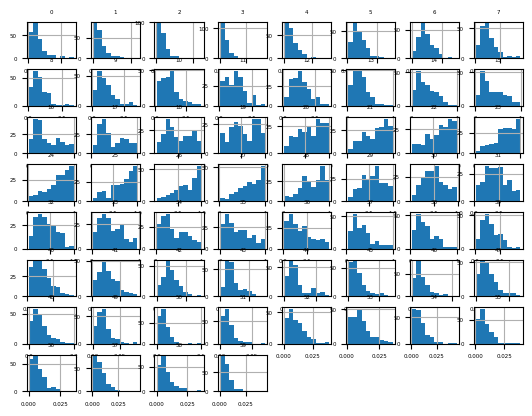

In [157]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [158]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Uniform Discretization Transform

A uniform discretization transform will preserve the probability distribution of each input variable but will make it discrete with the specified number of ordinal groups or labels. We can apply the uniform discretization transform using the KBinsDiscretizer class and setting the strategy argument to ‘uniform’. We must also set the desired number of bins set via the n bins argument; in this case, we will use 10. Once defined, we can call the fit transform() function and pass it our dataset to create a discretized transformed version of our dataset.

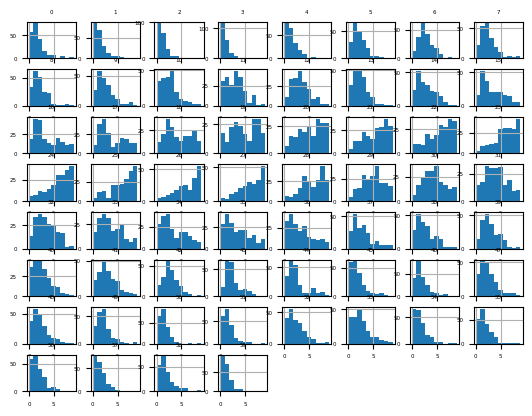

In [159]:
# visualize a uniform ordinal discretization transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform',subsample=200_000) 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the shape of the histograms generally matches the shape of the raw dataset, although in this case, each variable has a fixed number of 10 values or ordinal groups.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a uniform discretization transform of the dataset. The complete example is listed below.

In [160]:
# evaluate knn on the sonar dataset with uniform ordinal discretization transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform',subsample=200_000)
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.079)


Running the example, we can see that the uniform discretization transform results in a lift in performance from 79.7 percent accuracy without the transform to about 82.7 percent with the transform.

#### k-Means Discretization Transform

A k-means discretization transform will attempt to fit k clusters for each input variable and then assign each observation to a cluster. Unless the empirical distribution of the variable is complex, the number of clusters is likely to be small, such as 3-to-5. We can apply the k-means discretization transform using the KBinsDiscretizer class and setting the strategy argument to ‘kmeans’. We must also set the desired number of bins set via the n bins argument; in this case, we will use three. Once defined, we can call the fit transform() function and pass it to our dataset to create a discretized transformed version of our dataset.

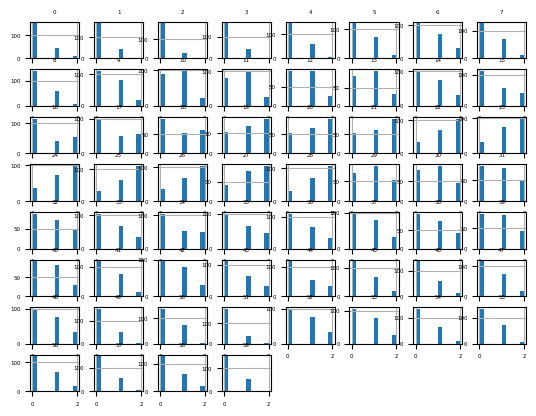

In [161]:
# visualize a k-means ordinal discretization transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans',subsample=200_000) 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the observations for each input variable are organized into one of three groups, some of which appear to be quite even in terms of observations, and others much less so.

Next, let’s evaluate the same KNN model as the previous section, but in this case on a k-means discretization transform of the dataset. The complete example is listed below.

In [162]:
#evaluate knn on the sonar dataset with k-means ordinal discretization transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str'))

# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans',subsample=200_000)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.821 (0.089)


Running the example, we can see that the k-means discretization transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.4 percent with the transform, although slightly less than the uniform distribution in the previous section.

#### Quantile Discretization Transform

A quantile discretization transform will attempt to split the observations for each input variable into k groups, where the number of observations assigned to each group is approximately equal. Unless there are a large number of observations or a complex empirical distribution, the number of bins must be kept small, such as 5-10. We can apply the quantile discretization transform using the KBinsDiscretizer class and setting the strategy argument to ‘quantile’. We must also set the desired number of bins set via the n bins argument; in this case, we will use 10.

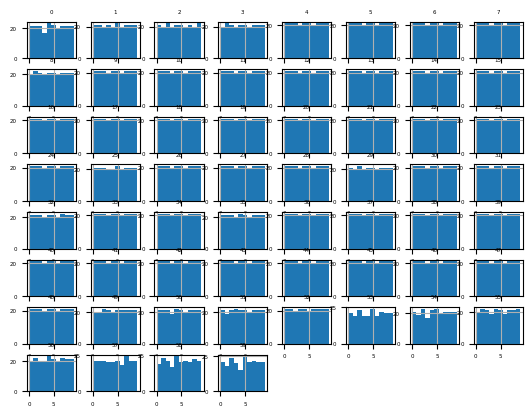

In [163]:
# visualize a quantile ordinal discretization transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer 
from matplotlib import pyplot

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a quantile discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile',subsample=200_000) 
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4)  for  x  in  fig.ravel()]

# show the plot 
pyplot.show()

Running the example transforms the dataset and plots histograms of each input variable. We can see that the histograms all show a uniform probability distribution for each input variable, where each of the 10 groups has the same number of observations.

Next, let’s evaluate the same KNN model as the previous section, but in this case, on a quantile discretization transform of the raw dataset. The complete example is listed below.

In [164]:
# evaluate knn on the sonar dataset with quantile ordinal discretization transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None)
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile',subsample=200_000)
model  =  KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.072)


Running the example, we can see that the uniform transform results in a lift in performance from 79.7 percent accuracy without the transform to about 84.0 percent with the transform, better than the uniform and k-means methods of the previous sections.

We chose the number of bins as an arbitrary number; in this case, 10. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model. The example below performs this experiment and plots the mean accuracy for different n bins values from two to 10.

>2 0.822 (0.077)
>3 0.878 (0.053)
>4 0.836 (0.083)
>5 0.840 (0.069)
>6 0.843 (0.069)
>7 0.854 (0.071)
>8 0.838 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


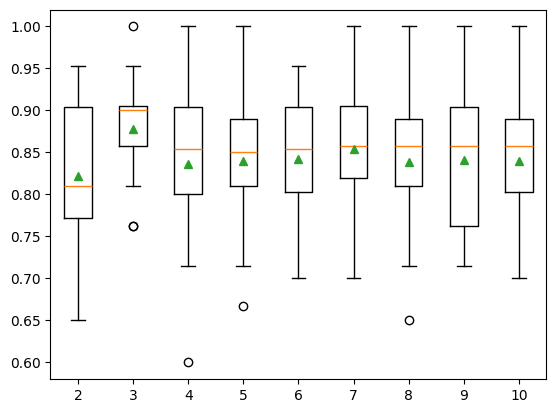

In [165]:
# explore number of discrete bins on classification accuracy 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer 
from sklearn.preprocessing import LabelEncoder 
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset 
def get_dataset():
    # load dataset
    path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
    dataset = read_csv(path_sonar_data, header=None)
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2,11):
        # define the pipeline
        trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile',subsample=200_000) 
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# get the dataset
X, y = get_dataset()

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.show()

Running the example reports the mean classification accuracy for each value of the n bins
argument.


In this case, we can see that surprisingly smaller values resulted in better accuracy, with values such as three achieving an accuracy of about 86.7 percent.

Box and whisker plots are created to summarize the classification accuracy scores for each number of discrete bins on the dataset. We can see a small bump in accuracy at three bins and the scores drop and remain flat for larger values. The results highlight that there is likely some benefit in exploring different numbers of discrete bins for the chosen method to see if better performance can be achieved.

### How to Derive New Input Variables

Often, the input features for a predictive modeling task interact in unexpected and often nonlinear ways. <br>These interactions can be identified and modeled by a learning algorithm. <br>Another approach is to engineer new features that expose these interactions and see if they improve model performance.<br> Additionally, transforms like raising input variables to a power can help to better expose the important relationships between input variables and the target variable.

These features are called interaction and polynomial features and allow the use of simpler modeling algorithms as some of the complexity of interpreting the input variables and their relationships is pushed back to the data preparation stage. <br>Sometimes these features can result in improved modeling performance, although at the cost of adding thousands or even millions of additional input variables. <br>In this tutorial, you will discover how to use polynomial feature transforms for feature engineering with numerical input variables. 

After completing this tutorial, you will know:
- Some machine learning algorithms prefer or perform better with polynomial input features.
- How to use the polynomial features transform to create new versions of input variables for predictive modeling.
- How the degree of the polynomial impacts the number of input features created by the transform.

🔷 **Purpose of Polynomial Features**
- Helps expose **non-linear interactions** between input variables.
- Enables **simpler models** to capture complex relationships.
- Often improves performance of models like **Linear Regression**, **Logistic Regression**.
- Useful in **numerical input tasks**, especially **regression problems**.


🔷 **Best Practices**
- Use **low-degree** polynomials (2 or 3) unless data is very small.
- Combine with **scaling (power/Gaussian transforms)** for better results.
- **Visualize** accuracy results (e.g., boxplots) to detect overfitting trends.
- Always validate with **cross-validation** due to stochastic variance.

#### Polynomial Feature Transform

The polynomial features transform is available in the scikit-learn Python machine learning library via the PolynomialFeatures class. <br>The features created include:
- The bias (the value of 1.0)
- Values raised to a power for each degree (e.g. x1, x2, x3,…)
- Interactions between all pairs of features (e.g. x1 × x2, x1 × x3,…)


For example, with two input variables with values 2 and 3 and a degree of 2, the features created would be:
- 1 (the bias)
- 2^1 = 2
- 3^1 = 3
- 2^2 = 4
- 3^2 = 9
- 2 × 3 = 6

In [166]:
# demonstrate the types of features created 
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures 

# define the dataset
data = asarray([[2,3],[2,3],[2,3]]) 
print(data)

# perform a polynomial features transform of the dataset 
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)

print(data)

[[2 3]
 [2 3]
 [2 3]]
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


Running the example first reports the raw data with two features (columns) and each feature has the same value, either 2 or 3. Then the polynomial features are created, resulting in six features, matching what was described above.

#### Sonar Dataset

The sonar dataset is a standard machine learning dataset for binary classification. It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced. A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross- validation. The dataset describes sonar returns of rocks or simulated mines. 

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


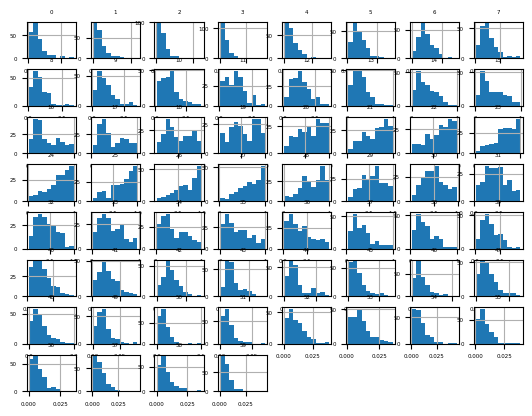

In [167]:
# load and summarize the sonar dataset 
from pandas import read_csv
from matplotlib import pyplot 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# summarize the shape of the dataset 
print(dataset.shape)

# summarize each variable 
display(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4) 
[x.title.set_size(4) for x in fig.ravel()]
# show the plot 
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset. <br>We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. <br>The complete example is listed below.

In [168]:
# evaluate knn on the raw sonar dataset 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


#### Polynomial Feature Transform Example

In [169]:
# visualize a polynomial features transform of the sonar dataset 
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures 

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 

# retrieve just the numeric input values 
data = dataset.values[:, :-1]

# perform a polynomial features transform of the dataset 
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)

# convert the array back to a dataframe 
dataset = DataFrame(data)

# summarize 
print(dataset.shape)

(208, 39711)


Running the example performs the polynomial features transform on the sonar dataset. We can see that our features increased from 61 (60 input features) for the raw dataset to 39,711 features (39,710 input features).

Next, let’s evaluate the same KNN model as the previous section, but in this case on a polynomial features transform of the dataset. The complete example is listed below.

In [170]:
# evaluate knn on the sonar dataset with polynomial features transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline

# load dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(path_sonar_data, header=None) 
data = dataset.values

# separate into input and output columns 
X, y = data[:, :-1], data[:, -1]

# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y  =  LabelEncoder().fit_transform(y.astype('str')) 

# define the pipeline
trans = PolynomialFeatures(degree=3) 
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)]) 

# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)


Running the example, we can see that the polynomial features transform results in a lift in performance from 79.7 percent accuracy without the transform to about 80.0 percent with the transform.

#### Effect of Polynomial Degree

The degree of the polynomial dramatically increases the number of input features. To get an idea of how much this impacts the number of features, we can perform the transform with a range of different degrees and compare the number of features in the dataset. The complete example is listed below.

In [ ]:
# compare the effect of the degree on the number of created features 
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures 
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None) 
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y


# define dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
X, y = get_dataset(path_sonar_data)

# calculate change in number of features 
num_features = list()
degress = [i for i in range(1, 6)] 

for d in degress:
    # create transform
    trans = PolynomialFeatures(degree=d) 
    
    # fit and transform
    data = trans.fit_transform(X) 
    
    # record number of features
    num_features.append(data.shape[1]) 
    
    # summarize
    print('Degree: %d, Features: %d' % (d, data.shape[1])) 

# plot degree vs number of features
pyplot.plot(degress, num_features) 
pyplot.show()

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376


Running the example first reports the degree from 1 to 5 and the number of features in the dataset. We can see that a degree of 1 has no effect and that the number of features dramatically increases from 2 through to 5. This highlights that for anything other than very small datasets, a degree of 2 or 3 should be used to avoid a dramatic increase in input variables.

More features may result in more overfitting, and in turn, worse results. It may be a good idea to treat the degree for the polynomial features transform as a hyperparameter and test different values for your dataset. 

The example below explores degree values from 1 to 4 and evaluates their effect on classification accuracy with the chosen model.

In [ ]:
# explore the effect of degree on accuracy for the polynomial features transform 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline 
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
    # load dataset
    dataset = read_csv(filename, header=None) 
    data = dataset.values
    # separate into input and output columns 
    X, y = data[:, :-1], data[:, -1]
    # ensure inputs are floats and output is an integer label
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str')) 
    return X, y

# get a list of models to evaluate 
def get_models():
    models = dict()
    for d in range(1,3):
        # define the pipeline
        trans = PolynomialFeatures(degree=d) 
        model = KNeighborsClassifier()
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)]) 
    return models

# evaluate a given model using cross-validation 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# define dataset
path_sonar_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
X, y = get_dataset(path_sonar_data) 

# get the models to evaluate 
models = get_models()

# evaluate the models and store results 
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name)
    print('>%s %.3f (%.3f)'  % (name, mean(scores), std(scores))) 

# plot model performance for comparison 
pyplot.boxplot(results, tick_labels=names, showmeans=True) 
pyplot.show()

**/!\ Degrees 3 and 4 not taken into account. Too computationnally expensive for my laptop configuration !**

Running the example reports the mean classification accuracy for each polynomial degree.

In this case, we can see that performance is generally worse than no transform (degree 1) except for a degree 3. It might be interesting to explore scaling the data before or after performing the transform to see how it impacts model performance.

Box and whisker plots are created to summarize the classification accuracy scores for each polynomial degree. We can see that performance remains flat, perhaps with the first signs of overfitting with a degree of 4.

## Advanced Transforms

### How to Transform Numerical and Categorical Data

🔧 **Why Data Transformation Is Needed**
- Essential for preparing raw data before model training.
- Ensures machine learning algorithms can understand and learn from the data structure.
- Different types of data (numerical vs. categorical) require different preprocessing steps.

⚠️ **Challenges with Mixed Data Types**
- Mixed-type datasets need tailored preprocessing per column type.
- Manual separation and transformation of columns is inefficient and error-prone.


🧰 **Solution: ColumnTransformer (scikit-learn)**
- Enables selective transformation of specific columns.
- Automatically applies different transforms to numerical vs. categorical data.
- Avoids manual column management and recombination.

🔨 **How to Use ColumnTransformer**
- Define a list of transformers: Each as a tuple: ("name", transform_object, columns)
- Example usage:<br>
o	Apply **OneHotEncoder** to **categorical columns** (e.g., columns 0 & 1).<br>
o	Apply **SimpleImputer(median)** to **numerical columns**.
- **Remainder options**:<br>
o	**drop (default)**: drops unspecified columns.<br>
o	**passthrough**: passes through untouched columns.

🔁 **Integrating ColumnTransformer in a Pipeline**
- Combine ColumnTransformer with model in a Pipeline.
- Ensures consistent preprocessing for: **Training**, **Cross-validation**, **Future predictions**
- Enables automation and reproducibility.

🧠 **Key Takeaways for Practice**
- Mixed-type preprocessing is streamlined with ColumnTransformer.
- Always evaluate with cross-validation for reliable metrics.
- Modular and reusable pipelines increase efficiency and model accuracy.

#### Data Preparation for the Abalone Regression Dataset

The abalone dataset is a standard machine learning problem that involves predicting the age of an abalone given measurements of an abalone. The dataset has 4,177 examples, 8 input variables, and the target variable is an integer. A naive model can achieve a mean absolute error (MAE) of about 2.363 (std 0.092) by predicting the mean value, evaluated via 10-fold cross-validation.

We can see that the first column is categorical and the remainder of the columns are numerical. We may want to one hot encode the first column and normalize the remaining numerical columns, and this can be achieved using the ColumnTransformer. We can model this as a regression predictive modeling problem with a support vector machine model (SVR). First, we need to load the dataset. We can load the dataset directly from the file using the read csv() Pandas function, then split the data into two data frames: one for input and one for the output. The complete example of loading the dataset is listed below.

In [ ]:
# load the dataset
from pandas import read_csv 

# load dataset
path_abalone_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv  "
dataframe = read_csv(path_abalone_data, header=None) 

# split into inputs and outputs
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix] 

print(X.shape, y.shape)

Next, we can use the **select dtypes()** function to select the column indexes that match different data types. <br>We are interested in a list of columns that are numerical columns marked as float64 or int64 in Pandas, and a list of categorical columns, marked as object or bool type in Pandas.

In [ ]:
# example of using the ColumnTransformer for the Abalone dataset 
from numpy import mean
from numpy import std
from numpy import absolute 
from pandas import read_csv
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.svm import SVR

# load dataset
path_abalone_data = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv  "
dataframe = read_csv(path_abalone_data, header=None) 

# split into inputs and outputs
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix] 
print(X.shape, y.shape)

# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns 
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns 

# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)] 
col_transform = ColumnTransformer(transformers=t)

# define the model
model  =  SVR(kernel='rbf',gamma='scale',C=100)

# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)]) 

# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# convert MAE scores to positive values 
scores = absolute(scores)

# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

You now have a template for using the ColumnTransformer on a dataset with mixed data types that you can use and adapt for your own projects in the future.

### How to Transform the Target in Regression

📌 **Why Target Transformation Matters**
- **Critical** for boosting model performance in **regression tasks**.
- Transforms like scaling improve models sensitive to value range (e.g., linear models, SVMs).
- **Often overlooked**: Target variable (output) needs scaling too—not just input features.

📏 **Importance of Data Scaling**
- Helps algorithms that rely on:<br>
o	Weighted sums (Linear models, Neural Nets)<br>
o	Distance measures (SVM, KNN)
- Common techniques:<br>
o	MinMaxScaler → Normalize values to range [0,1]<br>
o	PowerTransformer → Make data more Gaussian-like
- Improves both input and target representations.


⚙️ **Two Ways to Scale Target Variables**<br>
1️⃣ **Manual Scaling**
- Requires multiple steps:
1.	Create and fit scaler (e.g., MinMaxScaler).
2.	Transform training and test target values.
3.	Invert transforms for predictions.
- ⚠️ Downside:<br>
o	Tedious<br>
o	Doesn’t integrate well with cross_val_score() or pipelines.<br>

2️⃣ **Automatic Scaling with TransformedTargetRegressor**
- Scikit-learn wrapper that:<br>
o	Automatically transforms and inverse-transforms target variable.<br>
o	Integrates with models and pipelines.<br>
- Defined by: **TransformedTargetRegressor(regressor=model, transformer=scaler)**
- ✅ Allows use of model evaluation functions like cross_val_score().


🧠 **Key Takeaways**
- Always consider transforming target variables in regression tasks.
- Use **TransformedTargetRegressor** for:<br>
o	Cleaner code<br>
o	Integration with cross-validation<br>
o	Avoiding manual transform/inverse headaches<br>
- Experiment with different transforms (MinMaxScaler, PowerTransformer) to boost accuracy.


#### Example of Using the TransformedTargetRegressor

In this section, we will demonstrate how to use the TransformedTargetRegressor on a real dataset. We will use the Boston housing regression problem that has 13 inputs and one numerical target and requires learning the relationship between suburb characteristics and house prices. 

In [ ]:
# load and summarize the dataset 
from numpy import loadtxt

# load data
boston_housing = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv "
dataset = loadtxt(boston_housing, delimiter=",") 

# split into inputs and outputs
X, y = dataset[:, :-1], dataset[:, -1]

# summarize dataset
print(X.shape, y.shape)

In [ ]:
# example of normalizing input and output variables for regression. 
from numpy import mean
from numpy import absolute 
from numpy import loadtxt
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor 

# load data
boston_housing = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv "
dataset = loadtxt(boston_housing, delimiter=",") 

# split into inputs and outputs
X, y = dataset[:, :-1], dataset[:, -1] 

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())]) 

# prepare the model with target scaling
model  =  TransformedTargetRegressor(regressor=pipeline,  transformer=MinMaxScaler())

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) 

# convert scores to positive
scores = absolute(scores) 

# summarize the result 
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Running the example evaluates the model with normalization of the input and output variables.

In this case, we achieve a MAE of about 3.2, much better than a naive model that achieved about 6.6.

We are not restricted to using scaling objects; for example, we can also explore using other data transforms on the target variable, such as the PowerTransformer, that can make each variable more-Gaussian-like (using the Yeo-Johnson transform) and improve the performance of linear models (introduced in Chapter 20). By default, the PowerTransformer also performs a standardization of each variable after performing the transform. It can also help to scale the values to the range 0-1 prior to applying a power transform, to avoid problems inverting the transform. We achieve this using the MinMaxScaler and defining a positive range (introduced in Chapter 17). The complete example of using a PowerTransformer on the input and target variables of the housing dataset is listed below.

In [ ]:
#example of power transform input and output variables for regression. 
from numpy import mean
from numpy import absolute 
from numpy import loadtxt
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor 
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor 

# load data
boston_housing = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv "
dataset = loadtxt(boston_housing, delimiter=",") 

# split into inputs and outputs
X, y = dataset[:, :-1], dataset[:, -1]

# prepare the model with input scaling and power transform 
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1)))) 
steps.append(('power', PowerTransformer())) 
steps.append(('model', HuberRegressor()))
pipeline = Pipeline(steps=steps)

# prepare the model with target scaling
model  =  TransformedTargetRegressor(regressor=pipeline,  transformer=PowerTransformer()) 

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) 

# convert scores to positive
scores = absolute(scores) 

# summarize the result 
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Running the example evaluates the model with a power transform of the input and output variables.

In this case, we see further improvement to a MAE of about 2.9.

### How to Save and Load Data Transforms

🚧 **Why It Matters**
- ✅ **Consistency is key**: Any transform applied during training must also be applied to **test or future data.**
- ❌ Inconsistent data preparation → **invalid predictions or degraded model performance.**
- ✅ Essential for **model deployment** and **real-world inference**.

⚠️ **Challenge: Preparing New Data**
- Input variables can vary in **scale or units** (e.g., inches, days, miles).
- **Models sensitive to input scale**:<br>
o	Logistic Regression<br>
o	Neural Networks<br>
o	KNN<br>
- **Scaling ensures**:<br>
o	Equal contribution of all features.<br>
o	Improved model stability and convergence.<br>
- 🎯 Scaling must be:<br>
o	Fit on **training data**<br>
o	Applied to both train and test/new data<br>
- ✅ Easy in-memory, ❌ Tricky when model is **saved for later use**

💡 **Solution: Save Data Preparation Objects**
- Save both:<br>
o	🧠 Trained model<br>
o	⚙️ Data preparation object (e.g., MinMaxScaler, StandardScaler)
- 🔧 Use **pickle** (Python built-in) for serialization.
- **Two options**:
1.	Save **entire object**s (easiest, most common).
2.	Save **parameters only** (for more control, **expert use**).

🧠 **Key Takeaways**
- Always **save the exact transform** used during training.
- Use tools like pickle to:<br>
o	Serialize models and scalers.<br>
o	Load them later for consistent preprocessing and inference.<br>
- 🔁 Reuse this workflow in real-world machine learning projects to ensure **reliable and repeatable results.**

#### Define a Dataset

First, we need a dataset. We will use a synthetic dataset, specifically a binary classification problem with two input variables created randomly via the make blobs() function. The example below creates a test dataset with 100 examples, two input features, and two class labels (0 and 1). The dataset is then split into training and test sets and the min and max values of each variable are then reported.
Importantly, the random state is set when creating the dataset and when splitting the data so that the same dataset is created and the same split of data is performed each time that the code is run.


In [ ]:
# example of creating a test dataset and splitting it into train and test sets 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 

# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1) 

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# summarize the scale of each input variable
for i in range(X_test.shape[1]):
    print('>%d, train: min=%.3f, max=%.3f, test: min=%.3f, max=%.3f' % (i, X_train[:, i].min(), X_train[:, i].max(),
    X_test[:, i].min(), X_test[:, i].max()))

Running the example reports the min and max values for each variable in both the train and test datasets. We can see that each variable has a different scale, and that the scales differ between the train and test datasets. This is a realistic scenario that we may encounter with a real dataset.

#### Scale the Dataset

Next, we can scale the dataset. We will use the MinMaxScaler to scale each input variable to the range 0-1 (introduced in Chapter 17). The best practice use of this scaler is to fit it on the training dataset and then apply the transform to the training dataset, and other datasets: in this case, the test dataset. The complete example of scaling the data and summarizing the effects is listed below.

In [ ]:
# example of scaling the dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1) 

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# define scaler
scaler = MinMaxScaler()
# fit scaler on the training dataset 
scaler.fit(X_train)

# transform both datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# summarize the scale of each input variable 
for i in range(X_test.shape[1]):
    print('>%d, train: min=%.3f, max=%.3f, test: min=%.3f, max=%.3f' % (i, X_train_scaled[:, i].min(), X_train_scaled[:, i].max(),
    X_test_scaled[:, i].min(), X_test_scaled[:, i].max()))

Running the example prints the effect of the scaled data showing the min and max values for each variable in the train and test datasets. We can see that all variables in both datasets now have values in the desired range of 0 to 1.

#### Save Model and Data Scaler

Next, we can fit a model on the training dataset and save both the model and the scaler object to file. We will use a LogisticRegression model because the problem is a simple binary classification task. The training dataset is scaled as before, and in this case, we will assume the test dataset is currently not available. Once scaled, the dataset is used to fit a logistic regression model. We will use the pickle framework to save the LogisticRegression model to one file, and the MinMaxScaler to another file. The complete example is listed below.

In [ ]:
# example of fitting a model on the scaled dataset 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from pickle import dump

# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1) 

# split data into train and test sets
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=1) 

# define scaler
scaler = MinMaxScaler()

# fit scaler on the training dataset 
scaler.fit(X_train)

# transform the training dataset 
X_train_scaled = scaler.transform(X_train) 

# define model
model = LogisticRegression(solver='lbfgs') 
model.fit(X_train_scaled, y_train)

# save the model
model_path = "../data/models/model.pkl"
dump(model, open(model_path, 'wb')) 

# save the scaler
scaler_path = "../data/scalers/scaler.pkl"
dump(scaler,  open(scaler_path,  'wb'))

Running the example scales the data, fits the model, and saves the model and scaler to files using pickle. <br>You should have two files in your current working directory:
- The model object: model.pkl
- The scaler object: scaler.pkl


#### Load Model and Data Scaler

Finally, we can load the model and the scaler object and make use of them. In this case, we will assume that the training dataset is not available, and that only new data or the test dataset is available. We will load the model and the scaler, then use the scaler to prepare the new data and use the model to make predictions. Because it is a test dataset, we have the expected target values, so we will compare the predictions to the expected target values and calculate the accuracy of the model. The complete example is listed below.

In [ ]:
# load model and scaler and make predictions on new data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from pickle import load 

# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1) 

# split data into train and test sets
_, X_test, _, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

# load the model
model_path = "../data/models/model.pkl"
model = load(open(model_path, 'rb'))

# load the scaler
scaler_path = "../data/scalers/scaler.pkl"
scaler = load(open(scaler_path, 'rb'))

# check scale of the test set before scaling 
print('Raw test set range')
for i in range(X_test.shape[1]):
    print('>%d, min=%.3f, max=%.3f' % (i, X_test[:, i].min(), X_test[:, i].max())) 

# transform the test dataset
X_test_scaled = scaler.transform(X_test) 

print('\nScaled test set range')
for i in range(X_test_scaled.shape[1]):
    print('>%d, min=%.3f, max=%.3f' % (i, X_test_scaled[:, i].min(), X_test_scaled[:, i].max()))
    
# make predictions on the test set 
yhat = model.predict(X_test_scaled) 

# evaluate accuracy
acc = accuracy_score(y_test, yhat) 

print('\nTest Accuracy:', acc)

Running the example loads the model and scaler, then uses the scaler to prepare the test dataset correctly for the model, meeting the expectations of the model when it was trained. To confirm the scaler is having the desired effect, we report the min and max value for each input feature both before and after applying the scaling. The model then makes a prediction for the examples in the test set and the classification accuracy is calculated. In this case, as expected, the data set correctly normalized the model achieved 100 percent accuracy on the test set because the test problem is trivial.